In [1]:
import numpy as np
import copy
import pickle
import os
import matplotlib.pyplot as plt
import random
import networkx as nx
import seaborn as sns
import sympy
import pandas as pd

color_map = ['#FFFFFF','#FF5733']
color1 = 'darkviolet'
color2 = 'indigo'

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Input Settings

In [2]:
## 初始化
seed = 19931028
size = [250,250]
p = 0.48            # 社团内部连接概率
q = 0.32            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [6]:
## 恢复情况0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [500,500]
p = 0.331            # 社团内部连接概率
q = 0.221            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [442]:
## modularity c=0.99
seed = 19931028
size = [333,333,334]
p = 0.99            # 社团内部连接概率
q = 0.01            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [344]:
## K = 3，恢复情况0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.331            # 社团内部连接概率
q = 0.221            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [9]:
## K = 3，恢复情况大于0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.34            # 社团内部连接概率
q = 0.22            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [2]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.60            # 社团内部连接概率
q = 0.30            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
#repeat = 1
knowp = True

In [11]:
## K = 4，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [200,300,400,500]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [12]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [33,33,34]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [13]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [22,33,45]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 2.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [434]:
## K = 4，完全恢复，非平衡网络

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [250,250,250,250]
niter = 10
vsteps = 100
trial = 1
beta1 = 2.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [435]:
Pstar_unbal = np.array([[0.5 , 0.29, 0.35, 0.25],
       [0.29, 0.45, 0.25, 0.3 ],
       [0.35, 0.25, 0.5 , 0.35],
       [0.25, 0.3 , 0.35, 0.45]])

# Initialization

In [2]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19980210
size = [300,300,300]
p = 0.45            # 社团内部连接概率
q = 0.30            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [3]:
R = np.diag(size)
K = R.shape[0]
n = np.sum(R)
c = np.repeat(np.arange(K), np.sum(R, axis=0))

In [4]:
R

array([[300,   0,   0],
       [  0, 300,   0],
       [  0,   0, 300]])

In [5]:
K

3

In [6]:
n

900

In [7]:
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [8]:
## 连接概率矩阵
Pstar = q * np.ones([K, K]) + np.diag((p - q) * np.ones(K))
Pstar

array([[0.45, 0.3 , 0.3 ],
       [0.3 , 0.45, 0.3 ],
       [0.3 , 0.3 , 0.45]])

In [ ]:
Pstar = Pstar_unbal
Pstar

In [9]:
## modularity模块度计算
def Q(adjacency_matrix, cluster): 
    #总边数
    m =sum(sum(adjacency_matrix))/2       #总边数
    k1 = np.sum(adjacency_matrix,axis=1)  #各个点的边数
    k2 = k1.reshape(k1.shape[0],1)        #将列表拆分成每个数一个列表
    #节点度数积
    k1k2 = k1*k2
    #任意两点连接边数的期望值
    Eij = k1k2/(2*m)
    #节点v和w的实际边数与随机网络下边数期望之差
    B = adjacency_matrix - Eij
    #获取节点、社区矩阵
    node_cluster = np.dot(cluster,np.transpose(cluster))
    results = np.dot(B,node_cluster)
    #求和
    sum_results = np.trace(results)
    #模块度计算
    Q = sum_results / (2 * m)
    print("Q:",Q)
    return Q

In [10]:
## 将组标签扩展，得到节点数*组数的矩阵，每行代表一个节点，第几个位置为1即分为第几组
## 返回结果：每个节点都是一个数组，属于的组为1，其余为0
def Zform(e, K):
    n = len(e)  #e是节点的分组列表community assgnment，n即为网络大小，共n个节点
    Ze = np.zeros((n, K))  #生成n*K的0矩阵（初始矩阵）
    Ze[np.arange(n), e] = 1  #对每个节点（每行）打标签
    return Ze

In [11]:
## 根据连边概率生成邻接矩阵A
def genA():
    Zc = Zform(c, K)  #输入c和组数K，得到扩展的分组矩阵
    Omega = np.matmul(np.matmul(Zc, Pstar), np.transpose(Zc))  #Pstar为转移矩阵（p和q未知的情况下，非平衡sbm）
    A = np.random.binomial(1, Omega)  #二项分布中采样1个数，Omega为取“正”的概率
    tmp = np.triu(A) - np.diag(np.diag(A))  #A的右上三角阵减去A的特征值
    A = tmp + np.transpose(tmp)
    return A

In [12]:
A = genA()

In [13]:
A

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
'''
测试一下保存邻接矩阵
'''
#A = genA()
AdjacentMatrix_dir = 'E:/学习/研三/Code/threshold_classic/Rcode'
pd.DataFrame(A).to_csv(AdjacentMatrix_dir + '/' + 'seed' + str(seed) + 'p' + str(p) + '.csv', header=True, index=False)

In [15]:
## 任取一个点，将其移动到别的组，返回值为各个节点的组序号（更新后），被更新的节点标签，被更新的节点原始组，被更新的节点新组
def updateK(e, K):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    setfull = list(range(K))  #制作一个组数K的list，setfull包含所有可能的组标签
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  #找到随机数在newe中的位置
    
    del setfull[newe[ind]]  #删除setfull中相应位置
    b_prime = np.random.choice(setfull)  #b'，从组列表中抽取一个其他的编号
    
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [16]:
def trace_L(e,b):
    _que=[] # 待抽取列表，按频数保存的相邻的组
    for _i,_b in enumerate(e):
        if _b == b: # 如果是要查的组
            for _j in range(len(A[_i])):
                if A[_i][_j]: # 如果相邻
                    _que.append(e[_j]) #记录相邻点的组标签
    return np.random.choice(_que) #从该组相邻的组中抽取一个组

In [17]:
def updateK_L(e,K, matO, L=1):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  # 保存原本的组标签
    
    ## 看周围点的组 并按比例随机抽一个 组
    _b = []  # 保存周围点的组
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            _b.append(newe[i])
    b_prime = np.random.choice(_b) #我的回合 抽！
    ## 跳L次组
    for _ in range(L):
        b_prime = random.choices(range(K), weights=matO[b_prime], k=1)[0] #从该组相邻的组中抽取一个组
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [18]:
def updateK_MeanField(e):  #updateK_(e, L=0)
    L = 0
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  # 保存原本的组标签
    
    ## 看周围点的组 并按比例随机抽一个 组
    _b = []  # 保存周围点的组
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            _b.append(newe[i])
    b_prime = np.random.choice(_b) #我的回合 抽！
    ## 跳L次组
    for _ in range(L):
        b_prime = trace_L(newe,b_prime)
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [19]:
def updateK_Wolff(e): # Wolff_1
    newe = copy.deepcopy(e)  # 确保多维列表复制成功
    n = len(newe)  # newe的长度
    
    ind = np.random.randint(n)  # 在newe中抽取一个数
    b = newe[ind] # 保存原本的组标签
    ## 看周围点的组 保存所有同组的节点 和 相邻点的组
    _ind = set([ind])
    _b = []  # 按组出现频率保存组标签
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            if newe[ind]==newe[i]: # 如果同组 记录一下 到时候一起变
                _ind.add(i)
            _b.append(newe[i]) # 记录组出现频率
            
    b_prime = np.random.choice(_b) # 我的回合 抽！
    for i in _ind:
        newe[i]=b_prime
    
    return newe, list(_ind), b, b_prime  #返回

In [20]:
## 任取多个点，将其移动到别的组，返回值为各个节点的组序号（更新后），被更新的节点标签，被更新的节点原始组，被更新的节点新组
def updateK_multi(e, K, step_len):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    ind_list = np.random.randint(0, n, step_len)  #在newe中抽取step_len个数，ind_list是每个数的位置
    b_list = newe[ind_list]  #找到随机数在newe中的位置
    b_prime_list = []
    for i in range(step_len):
        setfull = list(range(K))  #制作一个组数K的list，setfull包含所有可能的组标签
        del setfull[newe[ind_list[i]]]  #删除setfull中相应位置
        b_prime = np.random.choice(setfull)
        b_prime_list.append(b_prime)  #b'，从组列表中抽取一个其他的编号
        newe[ind_list[i]] = b_prime  #更新被抽取点的组标签
    return newe, ind_list, b_list, b_prime_list  #返回

In [21]:
## 更新移动后的扩展矩阵
def updateZe(Ze, ind, b, b_prime):
    newZe = copy.deepcopy(Ze)
    newZe[ind, b] = Ze[ind, b] - 1
    newZe[ind, b_prime] = Ze[ind, b_prime] + 1
    return newZe

In [22]:
## 更新移动后的扩展矩阵（多点同时移动）
def updateZe_multi(Ze, ind_list, b_list, b_prime_list):
    newZe = copy.deepcopy(Ze)
    newZe[ind_list, b_list] = Ze[ind_list, b_list] - 1
    newZe[ind_list, b_prime_list] = Ze[ind_list, b_prime_list] + 1
    return newZe

In [23]:
## 误差矩阵（混淆矩阵），Ze是扰乱后的扩展组标签，Zc是原本的扩展组标签，得到的矩阵为扰动前后判断矩阵
def Rdiff(e, c):
    K = np.max(c) + 1
    Ze = Zform(e, K)  #扰乱后的扩展组标签
    Zc = Zform(c, K)  #原本的扩展组标签
    R = np.matmul(np.transpose(Ze), Zc).astype(int)  #原本1，扰动后1；原本2，扰动后1；原本1，扰动后2；原本2，扰动后2
    return R

In [24]:
## 根据节点移动情况更新网络连边情况
def updateMat(matO, matN, ind, b, b_prime, Ze):
    A_ind = A[ind, ].reshape((-1, 1))                    #被选取点的连边情况
    tmp = (A_ind * Ze).sum(axis=0)  # dim: k             #和每块的连边数量
    new_matO = matO.copy()
    new_matO[b, :] = new_matO[b, :] - tmp                #第b个点（移动点）所在的组减去第b个点的连边情况
    new_matO[b_prime, :] = new_matO[b_prime, :] + tmp    #移动到组b_prime后的连边情况
    new_matO[:, b] = new_matO[:, b] - tmp                #对称更新
    new_matO[:, b_prime] = new_matO[:, b_prime] + tmp    #对称更新

    new_matN = matN.copy()
    nZe = Ze.sum(axis=0)
    new_matN[b, :] = new_matN[b, :] - nZe
    new_matN[b_prime, :] = new_matN[b_prime, :] + nZe
    new_matN[:, b] = new_matN[:, b] - nZe
    new_matN[:, b_prime] = new_matN[:, b_prime] + nZe
    new_matN[b, b] = new_matN[b, b] + 1 + 1
    # new_matN[b_prime, b_prime] = new_matN[b_prime, b_prime] + 1 - 1
    new_matN[b_prime, b] = new_matN[b_prime, b] - 1
    new_matN[b, b_prime] = new_matN[b, b_prime] - 1
    return new_matO, new_matN

In [25]:
def updateMat_multi(newZe):
    new_matO = np.matmul(np.matmul(np.transpose(newZe), A), newZe)
    new_matN = np.matmul(np.matmul(np.transpose(newZe), np.ones([n, n])), newZe) - np.diag(np.sum(newZe, axis=0))
    return new_matO, new_matN

In [26]:
## 后验分布计算方法
def loggam_apprx(x):
    tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)
    return tmp

In [27]:
## 对数后验分布的快速计算，输入为连边数，可能出现的最大连边数
def logpostpdf_fast(matO, matN):
    matY = matN - matO
    p = np.sum(
        loggam_apprx(matO + beta1 - 1) +
        loggam_apprx(matY + beta2 - 1) -
        loggam_apprx(matN + beta1 + beta2 - 2)
    ) / 2
    return p

In [28]:
## 新的对数后验分布计算方法
def logpostpdf_fast2(matO, matN):
    matY = matN - matO
    connect_in = np.sum(np.diag(matO)) / 2
    connect_be = np.sum(matO) / 2 - connect_in
    disconnect_in = np.sum(np.diag(matY)) / 2
    disconnect_be = np.sum(matY) / 2 - disconnect_in
    tmp = np.log(p) * connect_in + np.log(1-p) * disconnect_in + np.log(q) * connect_be + np.log(1-q) * disconnect_be
    return tmp

In [29]:
def network_permutation(e, correct_number):
    n = np.size(e)
    e = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    e[ind[:correct_number]] = c[ind[:correct_number]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e[ind[correct_number:]] = np.random.randint(K, size=(n-correct_number))  #选取剩余点，随机变为可能的值（放进任意组），可能正确
    #alginitR = Rdiff(e0, c)  #更新错误矩阵
    return e

In [30]:
'''
输入为4*9000的格式
输出为1*9000的格式
相当于每4步记录一个值，降低采样前后相关性
'''
def autocorrelation_list(logpost_each_test):
    logpost_concact = []
    for i in range(len(logpost_each_test)):
        for j in range(len(logpost_each_test[i])):
            logpost_concact.append(logpost_each_test[i][j])

    logpost_simple = []
    for _ in range(int(len(logpost_concact)/4)):
        logpost_simple.append(logpost_concact[_*4])
    return logpost_simple

In [31]:
## 对于某一次特定恢复进行收敛性分析
def autocorrelation_time(logpost_list, tau):
    Rtau_list = []
    T = niter
    scale_para = T - tau
    logpost_avg = np.mean(logpost_list)
    logpost_std = np.std(logpost_list)
    logpost_sigma = logpost_std ** 2
    Rtau = 0
    for i in range(1, len(logpost_list) - tau):
        Rtau += (logpost_list[i] - logpost_avg) * (logpost_list[i+tau] - logpost_avg) / scale_para / logpost_sigma
        Rtau_list.append(Rtau)
    return Rtau_list

In [32]:
'''
输入整合后的logpost，是某个特定p值下的50次恢复情况
数据量p_range*repeat*niter
输出整个所有情况下后验的最大值，最小值和当前p值下后验分布最终值
'''
def logpost_color(logpost_simple_list):
    df_bound = pd.DataFrame(logpost_simple_list)
    logpost_upperbound = np.max(df_bound.iloc[:,-1])
    logpost_lowerbound = np.min(df_bound.iloc[:,-1])
    color_array = (df_bound.iloc[:,-1] - logpost_lowerbound) / (logpost_upperbound - logpost_lowerbound)
    return logpost_upperbound, logpost_lowerbound, color_array

In [33]:
def RIindex(e0, true_label):
    a = b = c = d = 0
    for i in range(len(e0)):
        for j in range(i, len(e0)):
            if e0[i] == e0[j]:
                if true_label[i] == true_label[j]:
                    a += 1
                else:
                    c += 1
            else:
                if true_label[i] == true_label[j]:
                    d += 1
                else:
                    b += 1
    RI = (a + b) / (a + b + c + d)
    return RI

In [34]:
'''
y表示p或q其中某一个值，求另一个
'''
def detection_threshold(n, y):
    x = sympy.Symbol('x')
    I = -2 * sympy.log(sympy.sqrt(x)*(round(sympy.sqrt(y), 5)) + sympy.sqrt(1-x)*round(sympy.sqrt(1-y), 5))
    equation = n*I - 2*round(sympy.log(n), 5)
    threshold = sympy.solve(equation, x)
    return threshold

In [35]:
'''
计算每个参数下50次恢复中的恢复情况出现频次
'''
def RI_frequency_list(RI_list):
    count_range = np.linspace(0.5, 1.0, 6)
    count_list = np.zeros((5, )).astype(int)
    for i in RI_list:
        for l in range(len(count_range)):
            if count_range[l] < i < count_range[l+1]:
                count_list[l] += 1
            else:
                l += 1
    return count_list

In [36]:
def RI_frequency_count(RI_list):
    count_range = np.linspace(0.5, 1.0, 6)
    count_list = np.zeros((5, )).astype(int)
    for i in RI_list:
        for l in range(len(count_range)):
            if count_range[l] < i <= count_range[l+1]:
                count_list[l] += 1
            else:
                l += 1
    return count_list

In [37]:
def mistake_rate(R_list):
    repeat = len(R_list)
    mistake_list = []
    for i in range(repeat):
        mis_matrix = R_list[i]
        mistake = n - np.sum(np.max(mis_matrix, axis=0) + np.max(mis_matrix, axis=1)) / 2
        max_mistake = n - n / K 
        mistake_list.append(1 - mistake / max_mistake)
    return np.mean(mistake_list)

In [38]:
def mistake_rate_detail(R_list):
    repeat = len(R_list)
    mistake_list = []
    for i in range(repeat):
        mis_matrix = R_list[i]
        mistake = n - np.sum(np.max(mis_matrix, axis=0) + np.max(mis_matrix, axis=1)) / 2
        max_mistake = n - n / K 
        mistake_list.append(1 - mistake / max_mistake)
    return mistake_list

# Figure Plot

Classic_MH

In [39]:
p_range = [round(i,4) for i in np.linspace(0.40, 0.60, 101)]
repeat = 50

In [40]:
finallogpost_list_classic = []
finalR_list_classic = []
finale_list_classic = []
finalRI_list_classic = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_classic" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" + str(pkl_number)
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finallogpost_list_classic.append(data_temp[0])
    finalR_list_classic.append(data_temp[3])
    finale_list_classic.append(data_temp[4])
    finalRI_list_classic.append(data_temp[5])
    #print(data_temp[3])

收敛性分析

In [41]:
'''
总共101个参数下进行恢复实验
'''
len(finallogpost_list_classic)

101

In [42]:
'''
每个参数下进行50次恢复
后续应该对50次的收敛时间进行分析，可以得到在不同参数下的平均收敛速度
'''
len(finallogpost_list_classic[0])

50

In [43]:
'''
每次恢复中重复4轮采样，共4*n*10次采样
'''
len(finallogpost_list_classic[0][0])

4

In [44]:
'''
每轮轮n*10次
'''
len(finallogpost_list_classic[0][0][0])

9000

In [46]:
logpost_simple_test = autocorrelation_list(finallogpost_list_classic[0][0])

In [47]:
len(logpost_simple_test)

9000

In [48]:
logpost_simple_list_classic = []
for i in range(len(p_range)):
    logpost_simple_list_eachp = []
    for j in range(repeat):
        logpost_simple_list_eachp.append(autocorrelation_list(finallogpost_list_classic[i][j]))
    logpost_simple_list_classic.append(logpost_simple_list_eachp)

In [49]:
len(logpost_simple_list_classic)

101

In [50]:
len(logpost_simple_list_classic[0])

50

In [51]:
pd.DataFrame(logpost_simple_list_classic[0])

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,-257197.407055,-257197.539872,-257197.289474,-257197.073572,-257196.446916,-257196.412472,-257196.780706,-257196.686419,-257196.469035,-257196.240121,...,-256270.213060,-256270.481730,-256270.249555,-256269.428081,-256269.286288,-256267.215944,-256267.215944,-256267.215944,-256263.038732,-256263.322674
1,-257198.900857,-257198.896359,-257199.159462,-257198.847539,-257198.877479,-257198.765906,-257198.471601,-257198.335003,-257198.327150,-257198.350776,...,-256205.866844,-256206.719834,-256206.719834,-256206.832288,-256206.201515,-256206.353087,-256205.983490,-256205.829008,-256205.829008,-256206.603147
2,-257198.119797,-257198.088538,-257197.909548,-257198.109388,-257198.099540,-257198.249577,-257198.153167,-257198.089836,-257198.140212,-257198.201094,...,-256151.560683,-256151.864216,-256152.251364,-256152.487927,-256152.487927,-256152.175873,-256152.175873,-256151.948172,-256151.894257,-256151.381045
3,-257194.050421,-257194.054632,-257194.719531,-257195.037836,-257194.691036,-257194.307157,-257193.521621,-257195.054933,-257194.956318,-257195.143482,...,-257139.274849,-257139.710543,-257140.763256,-257140.639816,-257140.988377,-257139.507975,-257139.980437,-257139.820530,-257139.777191,-257139.060473
4,-257197.254069,-257197.168065,-257197.540457,-257197.243764,-257197.528062,-257197.448070,-257197.359797,-257197.475235,-257197.405513,-257197.336749,...,-256117.355239,-256117.355239,-256116.606046,-256117.237405,-256118.115042,-256118.253472,-256118.032635,-256118.032635,-256117.434639,-256117.434639
5,-257198.534711,-257198.599645,-257198.393364,-257198.351156,-257198.366662,-257198.465307,-257198.421966,-257198.683171,-257198.825419,-257198.957686,...,-256144.149562,-256144.040522,-256143.387604,-256143.125588,-256142.805151,-256142.744123,-256142.268164,-256142.299591,-256142.426568,-256142.876737
6,-257195.403326,-257195.159037,-257195.008830,-257195.034482,-257194.582106,-257194.639935,-257194.597785,-257194.305834,-257194.572924,-257194.595249,...,-256142.503380,-256141.327029,-256141.922246,-256141.918018,-256141.781768,-256141.120656,-256141.120656,-256140.481456,-256139.938292,-256140.068610
7,-257196.002284,-257195.314619,-257195.040076,-257194.898478,-257194.882845,-257195.042378,-257195.066246,-257195.205921,-257194.638690,-257194.678421,...,-256345.871557,-256345.232722,-256345.353090,-256345.281920,-256346.113978,-256347.020120,-256347.451306,-256347.451306,-256346.964611,-256347.945813
8,-257197.713727,-257197.669007,-257198.001032,-257197.673279,-257197.721965,-257197.806493,-257197.352324,-257197.426990,-257197.033527,-257196.902441,...,-256936.639527,-256934.679960,-256934.679960,-256932.786671,-256930.492133,-256930.791293,-256930.988475,-256929.125549,-256930.486954,-256928.336501
9,-257199.209161,-257199.036565,-257199.096609,-257199.161061,-257199.071896,-257199.083809,-257199.024756,-257199.096603,-257199.051195,-257198.920011,...,-257050.166254,-257048.785281,-257051.019023,-257051.124239,-257050.926934,-257051.299366,-257053.754856,-257053.871996,-257052.958093,-257056.057904


In [106]:
df_finalRI_classic = pd.DataFrame(finalRI_list_classic)
df_finalRI_classic

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.715849,0.759452,0.765670,0.558685,0.757968,0.759433,0.759549,0.728687,0.568418,0.557403,...,0.758750,0.561884,0.672983,0.961100,0.734239,0.556739,0.632322,0.975200,0.762072,0.808630
1,0.562770,0.556244,0.945061,0.698841,0.556278,0.741564,0.983857,0.555911,0.768595,0.556451,...,0.755881,0.985340,0.557388,0.556436,0.769380,0.557351,0.973740,0.764111,0.556192,0.985325
2,0.780291,0.719610,0.759924,0.556347,0.561731,0.556599,0.566588,0.986802,0.981021,0.766874,...,0.758927,0.718722,0.767125,0.763524,0.558012,0.557067,0.766149,0.558143,0.770702,0.740730
3,0.768909,0.556895,0.683561,0.951449,0.572413,0.985332,0.909742,0.852736,0.761260,0.556397,...,0.614485,0.574332,0.769399,0.763337,0.758350,0.988302,0.557753,0.772477,0.580239,0.991190
4,0.924925,0.761371,0.989732,0.770790,0.556759,0.760987,0.771343,0.992653,0.557807,0.988257,...,0.989710,0.992640,0.989708,0.838957,0.887895,0.992653,0.556833,0.771052,0.982417,0.986792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.000000,0.893097,0.779445,0.778113,1.000000,0.778034,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.778656
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.778034,...,0.998523,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.998523,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99,1.000000,1.000000,0.779011,1.000000,1.000000,1.000000,1.000000,1.000000,0.778656,1.000000,...,1.000000,1.000000,0.778113,1.000000,0.778323,1.000000,0.778182,0.997050,1.000000,0.976917


In [110]:
df_finalRI_classic.iloc[0,:][18]

0.7657614995683808

In [114]:
finalR_list_classic[0][18]

array([[152,   7, 145],
       [148,   0, 152],
       [  0, 293,   3]])

In [112]:
finale_list_classic[0][18]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2,

In [117]:
community_diagram_02 = []
for _ in finale_list_classic[0][18]:
    if _ == 2:
        community_diagram_02.append(1)
    elif _ == 1:
        community_diagram_02.append(2)
    elif _ == 0:
        community_diagram_02.append(0)
community_diagram_02 = np.array(community_diagram_02)
community_diagram_02

array([0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1,

In [154]:
community_diagram_01 = []
for _ in finale_list_classic[0][14]:
    if _ == 2:
        community_diagram_01.append(0)
    elif _ == 0:
        community_diagram_01.append(1)
    elif _ == 1:
        community_diagram_01.append(2)
community_diagram_01 = np.array(community_diagram_01)

In [62]:
df_test = pd.DataFrame(logpost_simple_list_classic[0])

In [67]:
df_color_classic.iloc[0,:]

0     0.431698
1     0.518905
2     0.531340
3     0.117371
4     0.515935
5     0.518865
6     0.519097
7     0.457373
8     0.136836
9     0.114806
10    0.111639
11    0.508127
12    0.113346
13    0.499021
14    0.956241
15    0.342178
16    0.363507
17    0.114446
18    0.531523
19    0.516680
20    0.115521
21    0.953454
22    0.502558
23    0.511501
24    0.141078
25    0.114046
26    0.489402
27    0.519176
28    0.519571
29    0.112487
30    0.115388
31    0.118629
32    0.508373
33    0.373422
34    0.938858
35    0.510845
36    0.112798
37    0.508615
38    0.112517
39    0.112645
40    0.517499
41    0.123769
42    0.345966
43    0.922200
44    0.468477
45    0.113479
46    0.264644
47    0.950401
48    0.524144
49    0.617260
Name: 0, dtype: float64

In [98]:
## 线条颜色，越深表示越好，紫橙配色
print(np.array([249, 220, 0])/255)  # 浅色
print(np.array([80, 0, 150])/255)   # 深色

[0.97647059 0.8627451  0.        ]
[0.31372549 0.         0.58823529]


In [138]:
repeat = 50

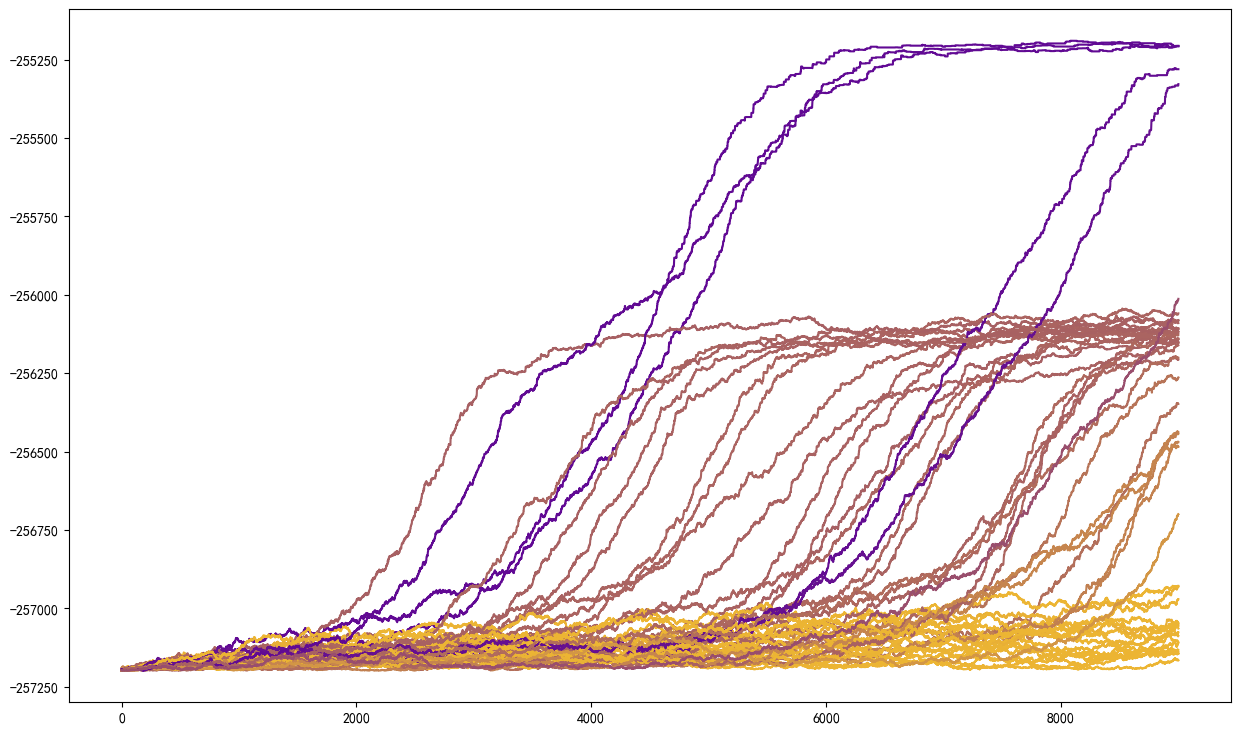

In [141]:
## p=0.4
plt.figure(figsize=(15,9))
for _ in range(repeat):
    color_array = df_color_classic.iloc[0,:]
    plt.plot(df_test.loc[_,:], color=(1-color_array[_]*0.65, 0.80-color_array[_]*0.80, 0.15+color_array[_]*0.45))
    #plt.legend()
fig_name = "p=" + str(p_range[0]) + "," + "q=" + str(q) + "," + "repeat=" + str(repeat) + "," + "logPost"
#plt.title(fig_name)
save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [143]:
df_test43 = pd.DataFrame(logpost_simple_list_classic[15])
print('p=', p_range[15])
df_test43

p= 0.43


,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,-260040.692138,-260040.347013,-260040.896557,-260040.944703,-260040.985978,-260041.253010,-260041.464650,-260041.667583,-260041.263719,-260040.903778,...,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555,-256615.002555
1,-260040.010787,-260039.953154,-260040.112476,-260040.105215,-260040.281822,-260039.997633,-260040.064376,-260040.080895,-260040.102841,-260039.776440,...,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401,-256813.454401
2,-260041.492937,-260041.348240,-260041.243739,-260041.048523,-260040.942430,-260040.296482,-260040.301973,-260040.863981,-260041.031097,-260040.855335,...,-258376.091170,-258375.760683,-258375.989073,-258376.026274,-258376.026274,-258376.026274,-258376.026274,-258376.525723,-258377.055100,-258377.266491
3,-260041.407373,-260041.236987,-260041.776828,-260041.691052,-260041.281065,-260041.104763,-260040.802601,-260040.708734,-260040.941901,-260040.960003,...,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942,-256612.989942
4,-260041.065503,-260040.978583,-260040.830198,-260040.827347,-260040.344562,-260040.445994,-260040.651826,-260040.169952,-260040.394523,-260040.096011,...,-258344.347279,-258344.347279,-258344.903157,-258344.903157,-258344.903157,-258344.903157,-258343.767500,-258342.151337,-258342.151337,-258342.552346
5,-260040.790981,-260040.763359,-260040.438358,-260040.136458,-260040.014302,-260040.202121,-260040.220255,-260040.292639,-260040.594085,-260040.783894,...,-259964.851670,-259965.317461,-259967.396519,-259967.027819,-259967.169283,-259967.909886,-259968.983425,-259969.507218,-259968.393407,-259968.327077
6,-260040.304922,-260040.207094,-260039.710078,-260039.673386,-260039.376821,-260039.332597,-260039.098459,-260038.478785,-260038.010733,-260038.373127,...,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055
7,-260040.515901,-260040.876344,-260040.328948,-260040.384512,-260040.510915,-260040.615205,-260040.429153,-260040.331922,-260039.978993,-260039.860932,...,-258332.312847,-258332.097378,-258332.449626,-258334.731927,-258335.147307,-258335.147307,-258335.147307,-258335.147307,-258336.052032,-258337.363422
8,-260039.403020,-260039.773231,-260039.858993,-260039.561726,-260039.770283,-260039.575997,-260039.222233,-260039.075915,-260038.386168,-260037.877605,...,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478,-256673.462478
9,-260040.077013,-260040.039214,-260039.911035,-260040.046915,-260040.459610,-260040.845775,-260040.902013,-260040.674840,-260039.935796,-260040.182998,...,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055,-256608.541055


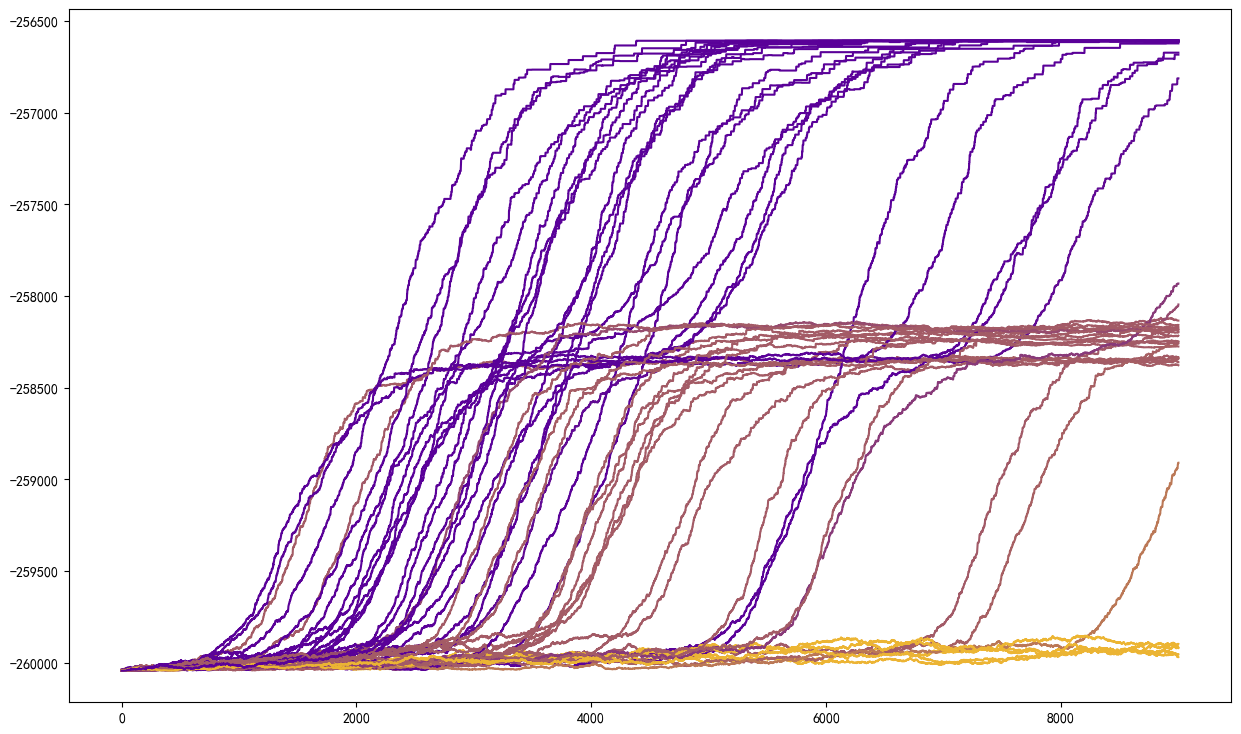

In [144]:
## p=0.45
plt.figure(figsize=(15,9))
for _ in range(repeat):
    color_array = df_color_classic.iloc[15,:]
    plt.plot(df_test43.loc[_,:], color=(1-color_array[_]*0.65, 0.80-color_array[_]*0.80, 0.15+color_array[_]*0.45))
    #plt.legend()
fig_name = "p=" + str(p_range[15]) + "," + "q=" + str(q) + "," + "repeat=" + str(repeat) + "," + "logPost"
#plt.title(fig_name)
save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [133]:
df_test45 = pd.DataFrame(logpost_simple_list_classic[25])
print('p=', p_range[25])
df_test45

p= 0.45


,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,-261941.846946,-261941.454539,-261941.096925,-261940.680503,-261940.659509,-261940.330872,-261940.481427,-261940.693486,-261941.396066,-261941.069337,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977
1,-261943.907993,-261944.108346,-261944.047253,-261943.782657,-261943.427725,-261943.535318,-261943.555324,-261943.542728,-261943.139893,-261943.129703,...,-261834.487202,-261834.118839,-261836.002625,-261835.910464,-261835.029923,-261836.051101,-261835.962937,-261838.829415,-261837.253347,-261836.942201
2,-261940.540016,-261940.419153,-261940.517476,-261941.140583,-261940.900286,-261940.710656,-261940.841512,-261940.509236,-261940.477727,-261940.551724,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977
3,-261944.005708,-261944.162448,-261943.932814,-261943.887897,-261943.890060,-261943.650530,-261943.394928,-261943.632208,-261943.182020,-261943.094822,...,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540,-257645.703540
4,-261943.926040,-261943.471408,-261943.002347,-261943.081158,-261942.914273,-261941.956976,-261941.767824,-261941.826097,-261941.553127,-261941.690570,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977
5,-261942.952685,-261943.175763,-261942.915326,-261942.147321,-261942.102494,-261940.556965,-261940.476751,-261940.082397,-261940.223760,-261939.987907,...,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040,-257646.093040
6,-261940.321247,-261940.596574,-261941.205389,-261941.009252,-261941.002131,-261940.937834,-261940.317147,-261940.062918,-261940.151512,-261940.511106,...,-261886.761243,-261885.733720,-261885.967612,-261884.079011,-261882.240226,-261882.654609,-261881.782183,-261884.858566,-261885.067307,-261883.652468
7,-261944.478202,-261944.749370,-261944.867369,-261945.031226,-261944.711523,-261944.942658,-261944.511732,-261944.239515,-261944.391146,-261943.843215,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977
8,-261943.046133,-261942.528844,-261942.848524,-261942.867590,-261943.043307,-261943.392829,-261943.724947,-261944.041008,-261944.292618,-261944.064991,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977
9,-261942.045905,-261942.623541,-261942.828239,-261943.145517,-261943.136644,-261943.671805,-261943.822928,-261943.110248,-261942.843042,-261943.175807,...,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977,-257620.651977


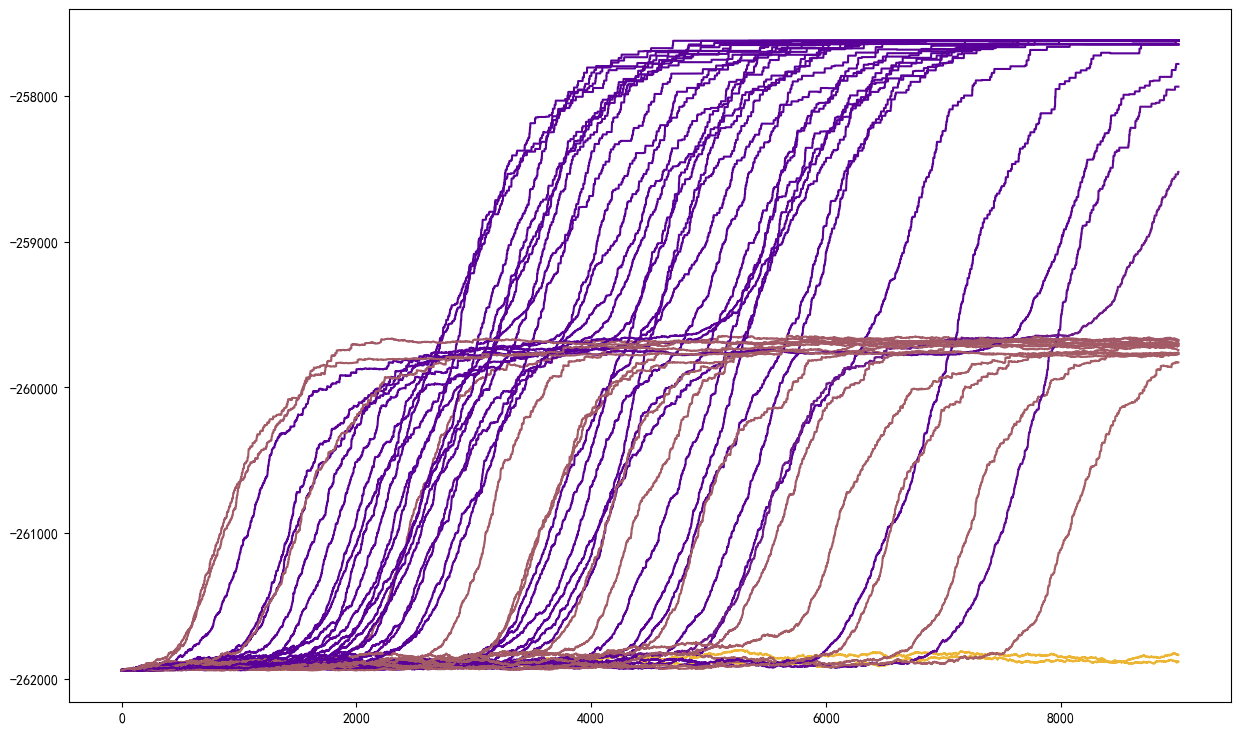

In [142]:
## p=0.45
plt.figure(figsize=(15,9))
for _ in range(repeat):
    color_array = df_color_classic.iloc[25,:]
    plt.plot(df_test45.loc[_,:], color=(1-color_array[_]*0.65, 0.80-color_array[_]*0.80, 0.15+color_array[_]*0.45))
    #plt.legend()
fig_name = "p=" + str(p_range[25]) + "," + "q=" + str(q) + "," + "repeat=" + str(repeat) + "," + "logPost"
#plt.title(fig_name)
save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [185]:
## 线条颜色，越深表示越好，青蓝配色
print(np.array([240,249,184])/255)  # 深色
print(np.array([51,166,195])/255)   # 浅色

[0.94117647 0.97647059 0.72156863]
[0.2        0.65098039 0.76470588]


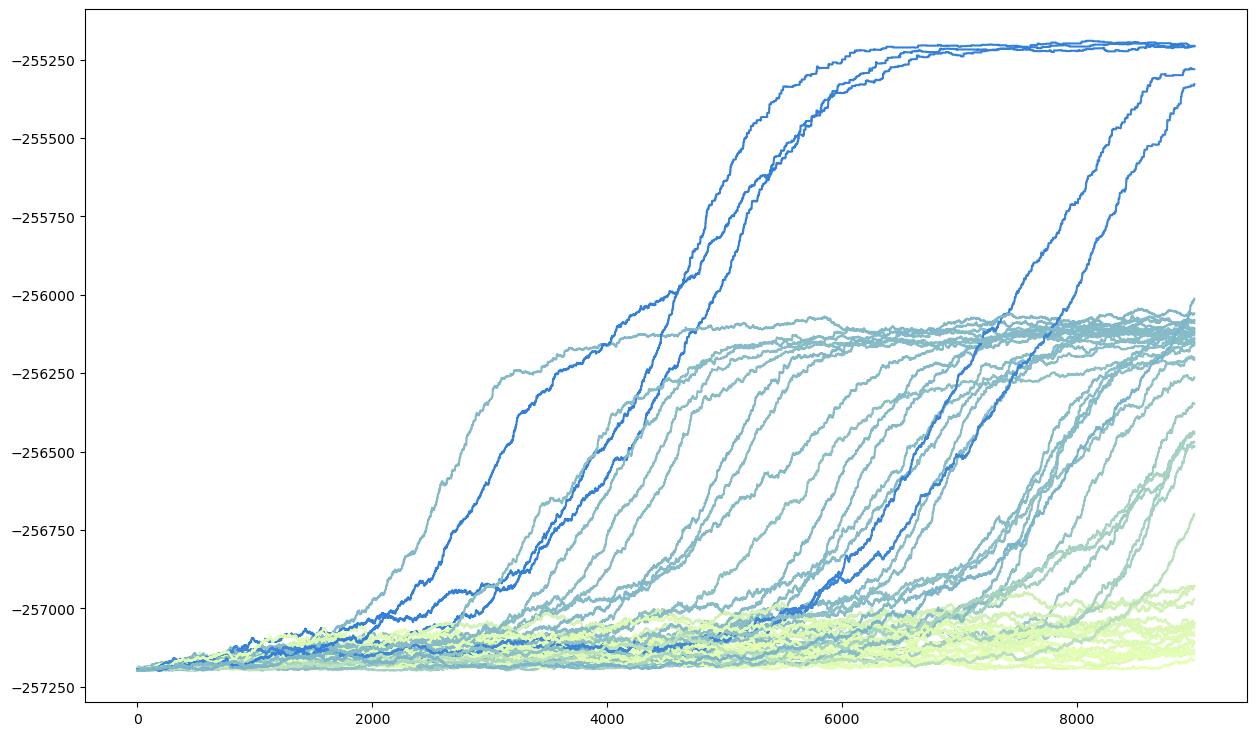

In [190]:
## 暂时停用
plt.figure(figsize=(15,9))
for _ in range(repeat):
    #plt.plot(pd.DataFrame(logpost_simple_list_classic[10]).loc[_,:], color=(205/255, min_max_list2[_], min_max_list2[_]))
    plt.plot(pd.DataFrame(df_test).loc[_,:], color=(0.9-min_max_list2[_]*0.7, 1-min_max_list2[_]*0.5, 0.7+min_max_list2[_]*0.15))
    #plt.legend()
plt.show()

In [63]:
pd.DataFrame(logpost_simple_list_classic[30])

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,-262805.725360,-262805.759535,-262805.831230,-262805.567393,-262805.235315,-262804.753136,-262804.520300,-262804.257361,-262804.229230,-262803.970755,...,-260356.519251,-260357.225677,-260354.770955,-260353.846295,-260353.846295,-260353.380133,-260353.380133,-260353.862784,-260353.693995,-260355.328080
1,-262803.518858,-262803.489935,-262803.721832,-262803.597517,-262803.158675,-262802.844535,-262802.351321,-262801.946883,-262801.253906,-262801.837052,...,-260366.683856,-260366.290716,-260366.269427,-260366.489302,-260366.394994,-260366.392325,-260365.933214,-260365.933214,-260365.933214,-260366.277282
2,-262804.342427,-262804.365866,-262804.428888,-262804.252296,-262804.435183,-262804.262415,-262803.799932,-262803.378968,-262803.499234,-262803.406239,...,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681
3,-262797.022974,-262796.618409,-262796.771970,-262796.855506,-262797.112445,-262797.037462,-262797.164451,-262797.446932,-262798.164302,-262798.098729,...,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681,-257949.956681
4,-262803.261834,-262803.188671,-262803.572213,-262803.629885,-262803.834586,-262804.117945,-262804.565407,-262804.382490,-262804.205174,-262804.145825,...,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074,-258006.941074
5,-262804.378353,-262804.104215,-262803.969734,-262803.263847,-262803.441453,-262803.287090,-262803.420418,-262803.613602,-262803.596427,-262803.553018,...,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598,-258121.345598
6,-262803.906520,-262803.927921,-262804.063307,-262804.084014,-262803.713898,-262803.957167,-262804.707678,-262804.707789,-262804.688256,-262804.987770,...,-260365.933765,-260365.933765,-260365.933765,-260365.933765,-260365.987560,-260365.589642,-260365.746480,-260364.715290,-260365.018476,-260364.785748
7,-262803.398791,-262803.314228,-262802.974353,-262803.012703,-262802.560619,-262802.462300,-262802.133659,-262802.240214,-262802.176639,-262802.781103,...,-260342.406351,-260343.582271,-260345.033828,-260345.033828,-260345.033828,-260345.033828,-260345.033828,-260346.688945,-260347.118441,-260347.118441
8,-262802.575444,-262801.822498,-262802.488847,-262803.501551,-262804.039808,-262803.963826,-262804.232948,-262804.313794,-262804.293296,-262804.397616,...,-262688.264705,-262688.620757,-262688.004857,-262689.567256,-262689.400892,-262690.895462,-262690.294229,-262689.471409,-262689.323113,-262689.458151
9,-262802.882625,-262802.887020,-262802.975222,-262803.021397,-262802.797808,-262803.189976,-262803.299618,-262803.129649,-262803.435938,-262803.444570,...,-260288.451320,-260288.261165,-260288.211977,-260288.211977,-260288.111006,-260287.338184,-260287.187267,-260288.074985,-260287.679283,-260287.679283


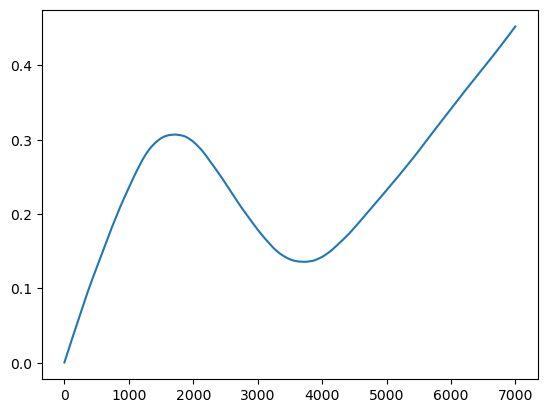

In [91]:
fig = plt.figure()
x = range(len(autocorrelation_time(logpost_simple, 2000)))
y = autocorrelation_time(logpost_simple, 2000)
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
#fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) +',' + 'repeat=' + str(repeat) + ',' + 'Classic_MH'
#plt.title(fig_name)
plt.plot(x, y)
#save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [81]:
len(autocorrelation_time(logpost_simple, 3000))

5999

识别性分析

In [35]:
x = sympy.Symbol('x')

In [63]:
'''
用四位小数近似计算
'''
I = -2 * sympy.log(sympy.sqrt(x)*(round(sympy.sqrt(q), 4)) + sympy.sqrt(1-x)*round(sympy.sqrt(1-q), 4))
I

-2*log(0.5477*sqrt(x) + 0.8367*sqrt(1 - x))

In [64]:
equation = n*I - 2*round(sympy.log(n), 4)
equation

-1800*log(0.5477*sqrt(x) + 0.8367*sqrt(1 - x)) - 13.605

In [65]:
'''
q=0.3时可识别阈值
较小值可能为“二部图”精确识别阈值
'''
detection threshold = sympy.solve(equation, x)

[0.194416212932286, 0.417547049889409]

In [74]:
detection_threshold(900, 0.3)

[0.194593775826460, 0.417402414407196]

In [81]:
finalRI_list_classic[0]

[0.7158490566037736,
 0.7594524602293747,
 0.7656702429399432,
 0.5586854112714268,
 0.7579676902207424,
 0.7594327290664693,
 0.7595486496485386,
 0.7286866444691084,
 0.5684178073745222,
 0.5574028856825749,
 0.5558194598594155,
 0.7540633863608336,
 0.5566728326550746,
 0.7495104205204094,
 0.9781206067332593,
 0.6710889135528425,
 0.6817536071032186,
 0.557222838821063,
 0.7657614995683808,
 0.758340115920582,
 0.5577605130102355,
 0.9767270933530645,
 0.7512788259958071,
 0.7557504007892465,
 0.5705389073868541,
 0.5570230607966457,
 0.7447009495622148,
 0.7595881119743495,
 0.7597854236034036,
 0.5562436798618818,
 0.5576939203354297,
 0.5593143420890369,
 0.7541867061289925,
 0.6867110617832038,
 0.9694290294734246,
 0.755422370205944,
 0.556399062769762,
 0.7543075595017882,
 0.5562584782340609,
 0.5563226045135035,
 0.7587495375508694,
 0.561884326057467,
 0.6729831051917622,
 0.9611000123319768,
 0.7342385004316192,
 0.5567394253298804,
 0.6323221112344308,
 0.975200394623258

In [86]:
count_list

array([0, 0, 0, 0, 0])

In [105]:
def RI_frequency_count(RI_list):
    count_range = np.linspace(0.5, 1.0, 6)
    count_list = np.zeros((5, )).astype(int)
    for i in RI_list:
        for l in range(len(count_range)):
            if count_range[l] < i <= count_range[l+1]:
                count_list[l] += 1
            else:
                l += 1
    return count_list

In [72]:
RI_frequency_classic = []
for i in range(len(p_range)):
    RI_frequency_classic.append(RI_frequency_count(finalRI_list_classic[i]))

In [73]:
RI_frequency_count(finalRI_list_classic[0])

array([17,  5, 22,  1,  5])

In [74]:
len(finalRI_list_classic[0])

50

In [75]:
RI_frequency_classic

[array([17,  5, 22,  1,  5]),
 array([24,  2, 16,  2,  6]),
 array([17,  0, 23,  0, 10]),
 array([12,  4, 19,  2, 13]),
 array([ 8,  1, 19,  3, 19]),
 array([17,  2, 20,  1, 10]),
 array([11,  2, 20,  1, 16]),
 array([12,  0, 18,  1, 19]),
 array([ 4,  3, 20,  3, 20]),
 array([ 5,  0, 25,  1, 19]),
 array([ 7,  1, 22,  0, 20]),
 array([ 6,  2, 23,  1, 18]),
 array([ 9,  1, 16,  2, 22]),
 array([ 9,  1, 12,  2, 26]),
 array([ 3,  0, 14,  3, 30]),
 array([ 5,  0, 18,  2, 25]),
 array([ 3,  3, 11,  3, 30]),
 array([ 5,  0, 24,  0, 21]),
 array([ 3,  1, 14,  0, 32]),
 array([ 4,  1, 22,  0, 23]),
 array([ 7,  2, 14,  0, 27]),
 array([ 7,  0, 23,  2, 18]),
 array([ 4,  0, 18,  1, 27]),
 array([ 1,  0, 22,  0, 27]),
 array([ 7,  1, 12,  1, 29]),
 array([ 2,  0, 15,  0, 33]),
 array([ 3,  1, 16,  1, 29]),
 array([ 4,  1, 15,  1, 29]),
 array([ 5,  0,  9,  2, 34]),
 array([ 5,  1, 20,  0, 24]),
 array([ 1,  1, 15,  1, 32]),
 array([ 4,  1, 10,  0, 35]),
 array([ 4,  0, 12,  2, 32]),
 array([ 5

In [76]:
#df_RI_frequency_meanfield = pd.DataFrame(RI_frequency_meanfield, index=p_range, columns=[0.55, 0.65, 0.75, 0.85, 0.95])
df_RI_frequency_classic = pd.DataFrame(np.transpose(RI_frequency_classic), index=[0.55, 0.65, 0.75, 0.85, 0.95], columns=p_range)
df_RI_frequency_classic = df_RI_frequency_classic.iloc[::-1]

In [176]:
df_RI_frequency_classic

,0.400,0.402,0.404,0.406,0.408,0.410,0.412,0.414,0.416,0.418,...,0.582,0.584,0.586,0.588,0.590,0.592,0.594,0.596,0.598,0.600
0.95,5,6,10,13,19,10,16,19,20,19,...,46,46,45,43,43,42,42,48,40,47
0.85,1,2,0,2,3,1,1,1,3,1,...,0,0,0,2,2,1,2,0,1,1
0.75,22,16,23,19,19,20,20,18,20,25,...,3,4,5,5,5,7,6,2,9,2
0.65,5,2,0,4,1,2,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
0.55,17,24,17,12,8,17,11,12,4,5,...,1,0,0,0,0,0,0,0,0,0


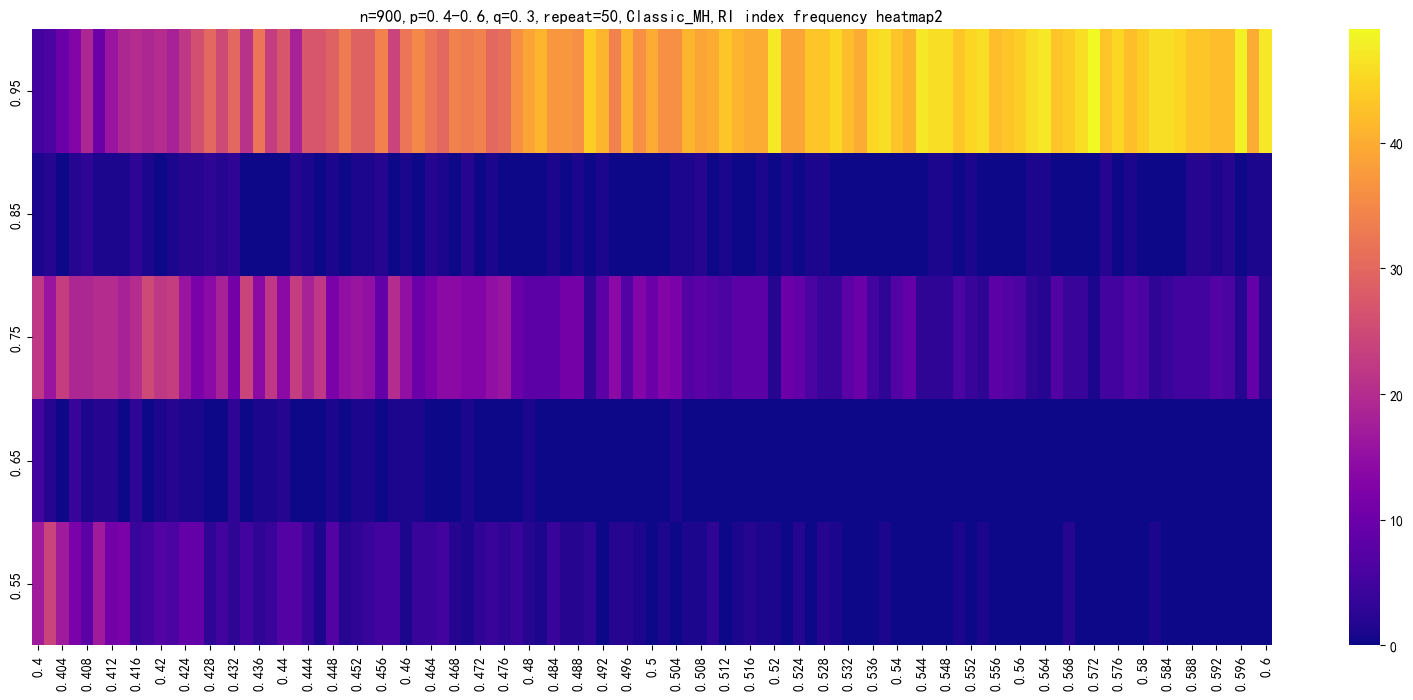

In [78]:
plt.figure(figsize=(20,8))
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) +','+ 'repeat=' + str(repeat) + ',' + 'Classic_MH'+','+ "RI index frequency heatmap2"
plt.xlabel('p')
#plt.ylabel('RI index')
plt.title(fig_name)
#sns.heatmap(df_RI_frequency_classic, cmap="YlGnBu", annot=False)
sns.heatmap(df_RI_frequency_classic, cmap="plasma", annot=False)
#save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

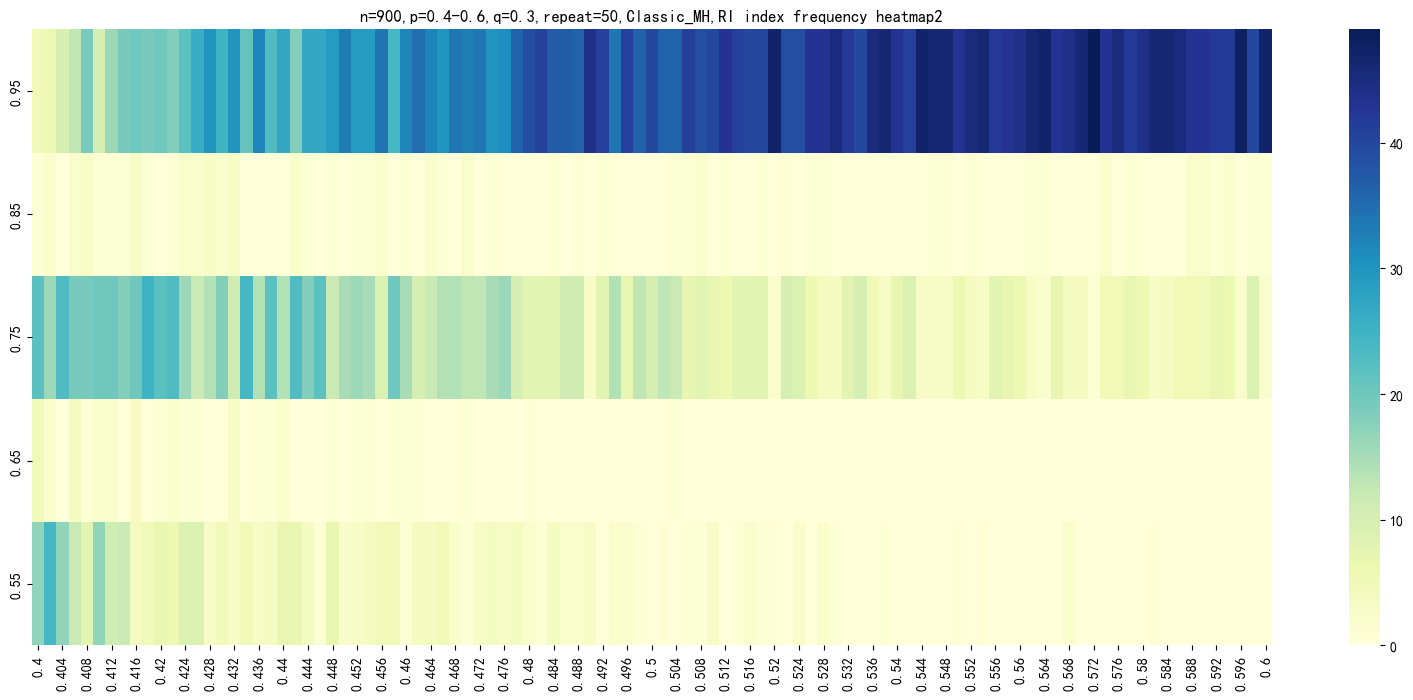

In [79]:
plt.figure(figsize=(20,8))
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) +','+ 'repeat=' + str(repeat) + ',' + 'Classic_MH'+','+ "RI index frequency heatmap2"
plt.xlabel('p')
#plt.ylabel('RI index')
plt.title(fig_name)
#sns.heatmap(df_RI_frequency_classic, cmap="YlGnBu", annot=False)
sns.heatmap(df_RI_frequency_classic, cmap="YlGnBu", annot=False)
#save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [42]:
finalRI_avg_list_classic = [np.mean(finalRI_list_classic[_]) for _ in range(len(finalRI_list_classic))]
finalRI_max_list_classic = [np.max(finalRI_list_classic[_]) for _ in range(len(finalRI_list_classic))]
finalRI_min_list_classic = [np.min(finalRI_list_classic[_]) for _ in range(len(finalRI_list_classic))]

In [34]:
finalRI_avg_list_classic

[0.7236080897767911,
 0.6872484893328401,
 0.7352290541373782,
 0.7634054014058456,
 0.8163205820693057,
 0.735193834011592,
 0.7871338512763595,
 0.7987518559625109,
 0.833248637316562,
 0.8259233444321122,
 0.8229332840054261,
 0.8205624367986188,
 0.8274626711061783,
 0.8467534837834506,
 0.8999984215069676,
 0.8654967073621901,
 0.890161894191639,
 0.8464125292884449,
 0.9031852016278209,
 0.8580756196818351,
 0.8601788629917375,
 0.828778098409175,
 0.8773368849426564,
 0.8878785053644098,
 0.8713490196078432,
 0.9134802811690714,
 0.8878104821802936,
 0.8864974719447528,
 0.9069884819336539,
 0.8585480823776053,
 0.9104529288444938,
 0.912269182389937,
 0.9023912196325071,
 0.88912699469725,
 0.9128785300283636,
 0.91746859045505,
 0.9140121839930941,
 0.8940367492909114,
 0.9008049327907264,
 0.9178786533481318,
 0.9378555678875322,
 0.9527853496115426,
 0.9240344308792701,
 0.9332641756073499,
 0.9298381551362683,
 0.9589970649895179,
 0.9602463928967814,
 0.9191849549882847,
 

In [77]:
finalR_list_classic[15]

[array([[  0,   0, 300],
        [  1, 299,   0],
        [299,   1,   0]]),
 array([[288,   0,   2],
        [  8, 300,   2],
        [  4,   0, 296]]),
 array([[150,   0, 140],
        [148,   1, 160],
        [  2, 299,   0]]),
 array([[299,   0,   0],
        [  0,   1, 300],
        [  1, 299,   0]]),
 array([[142,   0, 152],
        [  2, 299,   1],
        [156,   1, 147]]),
 array([[ 99,  97, 104],
        [ 96, 107,  98],
        [105,  96,  98]]),
 array([[  1, 300,   0],
        [299,   0,   0],
        [  0,   0, 300]]),
 array([[154,   0, 164],
        [  1, 299,   0],
        [145,   1, 136]]),
 array([[  3, 300,   0],
        [  0,   0, 299],
        [297,   0,   1]]),
 array([[  1, 300,   0],
        [  0,   0, 300],
        [299,   0,   0]]),
 array([[  1, 300,   0],
        [  0,   0, 300],
        [299,   0,   0]]),
 array([[119, 103,  92],
        [ 92,  95,  86],
        [ 89, 102, 122]]),
 array([[299,   0,   0],
        [  0,   0, 300],
        [  1, 300,   0]]),

In [78]:
finalRI_list_classic[15]

[0.9970501911456406,
 0.9766876310272536,
 0.7753582439265014,
 0.9970477247502775,
 0.7745517326427427,
 0.5563916635836724,
 0.9985226291774572,
 0.7760808977679122,
 0.9941127142680972,
 0.9985226291774572,
 0.9985226291774572,
 0.5579750894068319,
 0.9985226291774572,
 0.9970427919595511,
 0.7767221605623381,
 0.7769416697496608,
 0.9985226291774572,
 0.7652016278209397,
 0.9985226291774572,
 0.7752201257861635,
 0.9985226291774572,
 0.9970477247502775,
 0.9985226291774572,
 0.7710593168084844,
 0.9911826365766432,
 0.7758317918362313,
 0.9985226291774572,
 0.9970427919595511,
 0.7804982118633617,
 0.7765569120730053,
 0.9985226291774572,
 0.7063904303859909,
 0.9985226291774572,
 0.9970477247502775,
 0.9955728203230978,
 0.7818399309409299,
 0.816177087187076,
 0.9985226291774572,
 0.9985226291774572,
 0.9985226291774572,
 0.556524848933284,
 0.5569342705635714,
 0.7765569120730053,
 0.7758761869527685,
 0.8589739795289185,
 0.7769786656801085,
 0.7765914416080898,
 0.776788753237

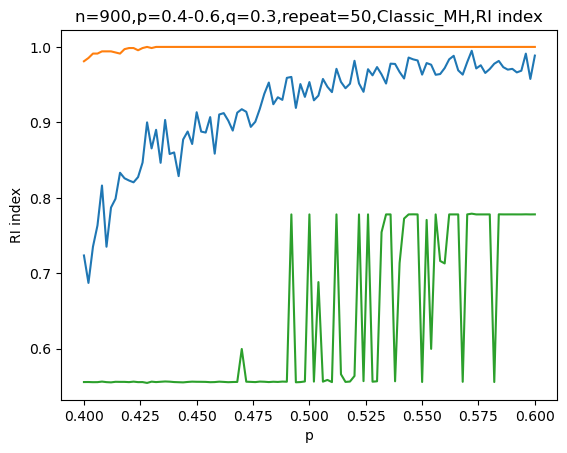

In [50]:
fig = plt.figure()
x = p_range
y1 = finalRI_avg_list_classic
y2 = finalRI_max_list_classic
y3 = finalRI_min_list_classic
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) +',' + 'repeat=' + str(repeat) + ',' + 'Classic_MH'+','+ "RI index"
plt.xlabel('p')
plt.ylabel('RI index')
plt.title(fig_name)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
#save_file = "E:/学习/研三/Code/threshold_classic" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [16]:
[round(i,4) for i in np.linspace(0.50, 0.60, 21)]

[0.5,
 0.505,
 0.51,
 0.515,
 0.52,
 0.525,
 0.53,
 0.535,
 0.54,
 0.545,
 0.55,
 0.555,
 0.56,
 0.565,
 0.57,
 0.575,
 0.58,
 0.585,
 0.59,
 0.595,
 0.6]

MeanField_MH

In [111]:
p_range = [round(i,4) for i in np.linspace(0.40, 0.60, 101)]
repeat = 50

In [112]:
finallogpost_list_meanfield = []
finalR_list_meanfield = []
finale_list_meanfield = []
finalRI_list_meanfield = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_meanfield" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" 
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finallogpost_list_meanfield.append(data_temp[0])
    finalR_list_meanfield.append(data_temp[3])
    finale_list_meanfield.append(data_temp[4])
    finalRI_list_meanfield.append(data_temp[5])
    #print(data_temp[3])

In [57]:
## 单独存一下RI index
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)
with open(dirmake + "RIindex" + ".pkl", "wb") as out:
    pickle.dump(finalRI_list_meanfield, out)

In [122]:
finalRI_list_meanfield

[[0.5326674065852757,
  0.6093106424959921,
  0.6778567024293994,
  0.566252312245653,
  0.5759403132322112,
  0.6459810087557035,
  0.5707904797138982,
  0.6314021457639659,
  0.5600098655814527,
  0.8091133308669379,
  0.7046170921198668,
  0.5596201751140708,
  0.5927068689110865,
  0.6508891355284252,
  0.6379824885929214,
  0.69055123936367,
  0.6794055987174744,
  0.5673251942286348,
  0.5888888888888889,
  0.6475200394623258,
  0.6881761006289309,
  0.5956714761376248,
  0.566183253175484,
  0.6728055247256135,
  0.6019755826859046,
  0.5080034529535085,
  0.6201775804661487,
  0.5908200764582563,
  0.6249747194475275,
  0.5930275003082994,
  0.7479195955111604,
  0.5463213713158219,
  0.6022123566407696,
  0.5653224811937354,
  0.5741423110124553,
  0.5574226168454803,
  0.5713429522752497,
  0.7336835614749044,
  0.8684005426069799,
  0.5941768405475397,
  0.520362560118387,
  0.575491429276113,
  0.5863706992230855,
  0.6401331853496115,
  0.6503613269207054,
  0.623186582809

In [188]:
finalRI_avg_list_meanfield = [np.mean(finalRI_list_meanfield[_]) for _ in range(len(finalRI_list_meanfield))]
finalRI_max_list_meanfield = [np.max(finalRI_list_meanfield[_]) for _ in range(len(finalRI_list_meanfield))]
finalRI_min_list_meanfield = [np.min(finalRI_list_meanfield[_]) for _ in range(len(finalRI_list_meanfield))]

In [145]:
RI_frequency_meanfield = []
for i in range(len(p_range)):
    RI_frequency_meanfield.append(RI_frequency_count(finalRI_list_meanfield[i]))

In [162]:
#df_RI_frequency_meanfield = pd.DataFrame(RI_frequency_meanfield, index=p_range, columns=[0.55, 0.65, 0.75, 0.85, 0.95])
df_RI_frequency_meanfield = pd.DataFrame(np.transpose(RI_frequency_meanfield), index=[0.55, 0.65, 0.75, 0.85, 0.95], columns=p_range)
df_RI_frequency_meanfield = df_RI_frequency_meanfield.iloc[::-1]

In [163]:
df_RI_frequency_meanfield

,0.400,0.402,0.404,0.406,0.408,0.410,0.412,0.414,0.416,0.418,...,0.582,0.584,0.586,0.588,0.590,0.592,0.594,0.596,0.598,0.600
0.95,0,0,0,0,0,0,2,0,0,3,...,32,28,35,36,27,29,31,36,31,28
0.85,0,0,0,1,0,4,3,7,4,7,...,0,3,3,1,3,5,0,1,4,4
0.75,4,9,5,8,9,11,13,9,13,22,...,18,18,11,13,19,16,18,12,15,18
0.65,15,19,24,19,26,21,23,21,19,9,...,0,1,1,0,1,0,0,0,0,0
0.55,30,21,20,22,14,14,9,13,14,9,...,0,0,0,0,0,0,1,1,0,0


In [221]:
np.transpose(pd.DataFrame(finalRI_avg_list_meanfield, index = p_range))

,0.400,0.402,0.404,0.406,0.408,0.410,0.412,0.414,0.416,0.418,...,0.582,0.584,0.586,0.588,0.590,0.592,0.594,0.596,0.598,0.600
0,0.595893,0.624354,0.619598,0.634749,0.637324,0.658011,0.680547,0.669387,0.664856,0.715233,...,0.914392,0.900929,0.928035,0.934305,0.89017,0.907592,0.904918,0.928759,0.915866,0.901043


In [226]:
df_finalRI_avg_list_meanfield = pd.DataFrame(finalRI_avg_list_meanfield, index = p_range)

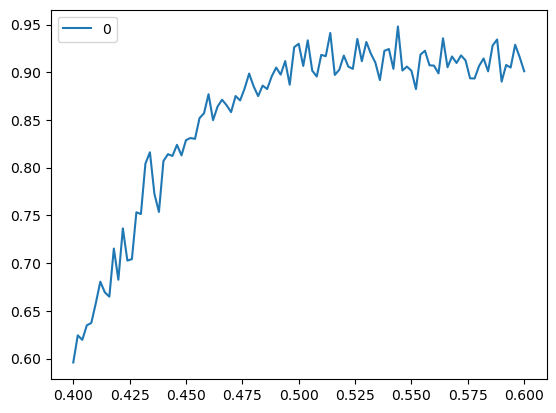

In [227]:
sns.lineplot(data=df_finalRI_avg_list_meanfield)
plt.show()

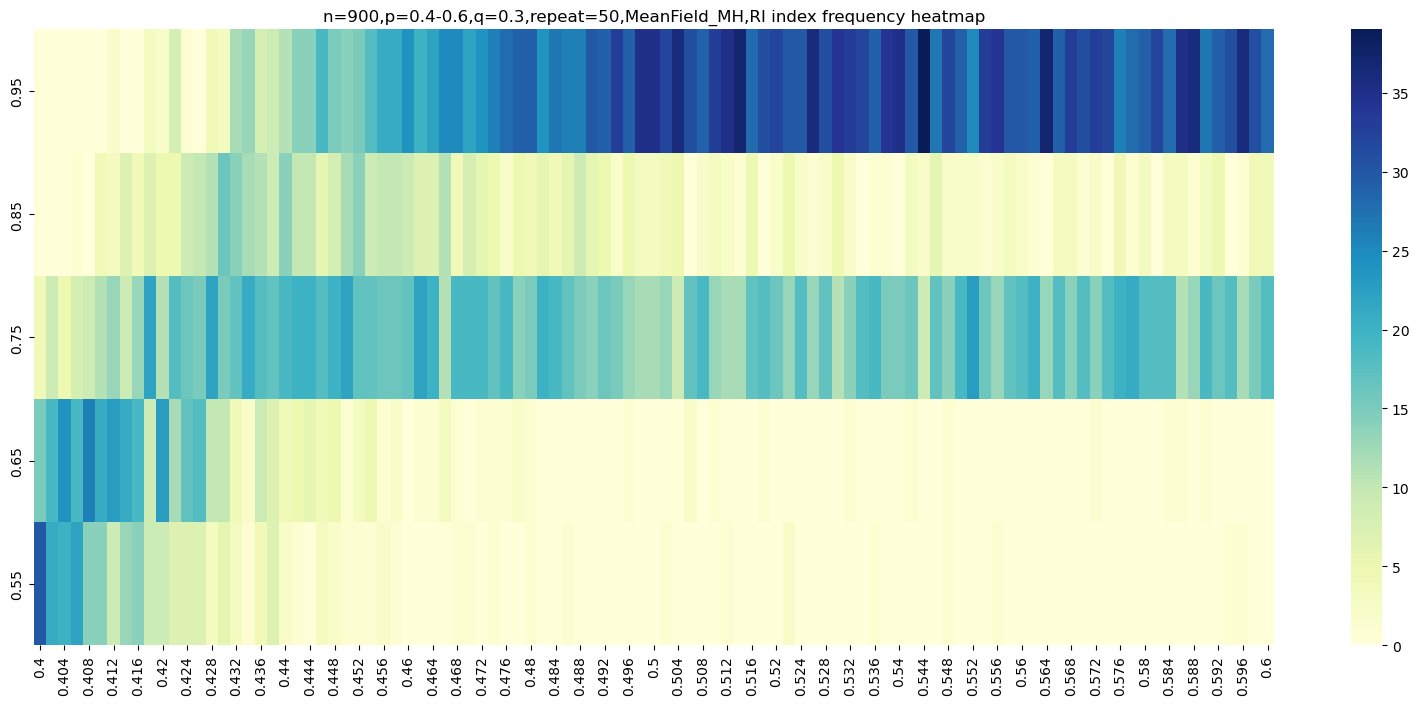

In [242]:
plt.figure(figsize=(20,8))
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) +',' + 'repeat=' + str(repeat) + ',' + 'MeanField_MH'+','+ "RI index frequency heatmap"
plt.xlabel('p')
#plt.ylabel('RI index')
plt.title(fig_name)
sns.heatmap(df_RI_frequency_meanfield, cmap="YlGnBu", annot=False)
#sns.lineplot(data=df_finalRI_avg_list_meanfield)
#save_file = "E:/学习/研三/Code/threshold_meanfield" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [143]:
len(RI_frequency_meanfield)

50

In [126]:
for _ in range(repeat):
    print('classic',finalRI_list_classic[15][_],'\n', finalR_list_classic[15][_],'\n'
          'meanfield',finalRI_list_meanfield[15][_],'\n', finalR_list_meanfield[15][_])

classic 0.9970501911456406 
 [[  0   0 300]
 [  1 299   0]
 [299   1   0]] 
meanfield 0.7110494512270317 
 [[265 234   2]
 [  1   4 217]
 [ 34  62  81]]
classic 0.9766876310272536 
 [[288   0   2]
 [  8 300   2]
 [  4   0 296]] 
meanfield 0.6859514120113455 
 [[183  20   3]
 [108  84  23]
 [  9 196 274]]
classic 0.7753582439265014 
 [[150   0 140]
 [148   1 160]
 [  2 299   0]] 
meanfield 0.6933900604266864 
 [[  4  63   0]
 [290  22 299]
 [  6 215   1]]
classic 0.9970477247502775 
 [[299   0   0]
 [  0   1 300]
 [  1 299   0]] 
meanfield 0.8367320261437908 
 [[  0 257   7]
 [ 52  16 271]
 [248  27  22]]
classic 0.7745517326427427 
 [[142   0 152]
 [  2 299   1]
 [156   1 147]] 
meanfield 0.6337649525218892 
 [[ 91   4 193]
 [166 129 101]
 [ 43 167   6]]
classic 0.5563916635836724 
 [[ 99  97 104]
 [ 96 107  98]
 [105  96  98]] 
meanfield 0.8646022937476877 
 [[  3 220  17]
 [296   4   7]
 [  1  76 276]]
classic 0.9985226291774572 
 [[  1 300   0]
 [299   0   0]
 [  0   0 300]] 
meanfi

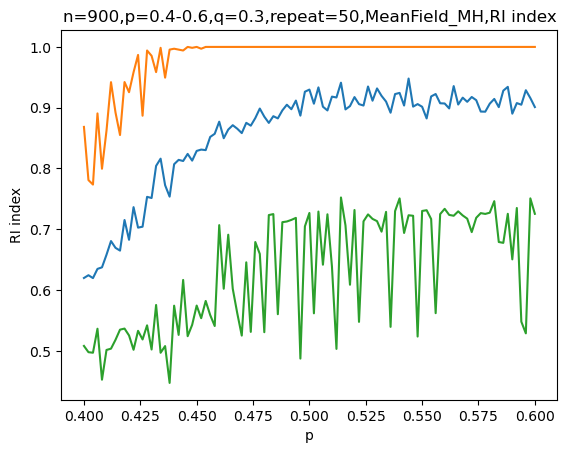

In [51]:
# 找相变点
fig = plt.figure()
x = p_range
y1 = finalRI_avg_list_meanfield
y2 = finalRI_max_list_meanfield
y3 = finalRI_min_list_meanfield
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) + ',' + 'repeat=' + str(repeat) + ',' + 'MeanField_MH'+','+'RI index'
plt.title(fig_name)
plt.xlabel('p')
plt.ylabel('RI index')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
#save_file = "E:/学习/研三/Code/threshold_meanfield" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [53]:
for i in range(50):
    print('classic:', finalR_list_classic[0][i])
    print('meanfield:', finalR_list_meanfield[0][i])

classic: [[133   6 139]
 [160   4 158]
 [  7 290   3]]
meanfield: [[ 44  40  98]
 [189 187 150]
 [ 67  73  52]]
classic: [[126 155  13]
 [173 142   5]
 [  1   3 282]]
meanfield: [[ 12  61 156]
 [167  46  25]
 [121 193 119]]
classic: [[  3   2 292]
 [149 149   4]
 [148 149   4]]
meanfield: [[ 26  37 175]
 [ 49 211  95]
 [225  52  30]]
classic: [[ 13 271   2]
 [191  25  87]
 [ 96   4 211]]
meanfield: [[103 165  91]
 [106  62 117]
 [ 91  73  92]]
classic: [[  2 153 161]
 [ 16 144 137]
 [282   3   2]]
meanfield: [[181  54 180]
 [ 28  60  23]
 [ 91 186  97]]
classic: [[ 50 228   8]
 [247  63   6]
 [  3   9 286]]
meanfield: [[165 120  54]
 [ 33  29 217]
 [102 151  29]]
classic: [[109  98 105]
 [111  96 105]
 [ 80 106  90]]
meanfield: [[137  21  80]
 [ 49  96  84]
 [114 183 136]]
classic: [[ 91 103  90]
 [ 95  98 105]
 [114  99 105]]
meanfield: [[104 108  42]
 [171 159  52]
 [ 25  33 206]]
classic: [[  3 283   6]
 [154   9 149]
 [143   8 145]]
meanfield: [[113  68  95]
 [ 97 101  92]
 [ 90 13

In [54]:
for i in range(50):
    print('classic:', finalR_list_classic[10][i])
    print('meanfield:', finalR_list_meanfield[10][i])

classic: [[163   0 150]
 [  2 298   1]
 [135   2 149]]
meanfield: [[  7  32 240]
 [194  46  26]
 [ 99 222  34]]
classic: [[  0 156 131]
 [  2 142 166]
 [298   2   3]]
meanfield: [[ 10 164  97]
 [233  11   5]
 [ 57 125 198]]
classic: [[276   3  18]
 [  3 293   2]
 [ 21   4 280]]
meanfield: [[  2 240   9]
 [ 45  56 238]
 [253   4  53]]
classic: [[ 43 108 132]
 [  1 186 162]
 [256   6   6]]
meanfield: [[ 53  10 231]
 [ 18 215   2]
 [229  75  67]]
classic: [[298   2   0]
 [  0 298   2]
 [  2   0 298]]
meanfield: [[241   3  26]
 [  5 229  30]
 [ 54  68 244]]
classic: [[173 145   3]
 [  0   0 292]
 [127 155   5]]
meanfield: [[247 182 106]
 [ 44 115   8]
 [  9   3 186]]
classic: [[143   0 165]
 [156   5 135]
 [  1 295   0]]
meanfield: [[  2  26 257]
 [278   6   0]
 [ 20 268  43]]
classic: [[138 156   3]
 [161 141   2]
 [  1   3 295]]
meanfield: [[154 205 171]
 [123  41  96]
 [ 23  54  33]]
classic: [[162 137   2]
 [  0   0 295]
 [138 163   3]]
meanfield: [[ 49 177 192]
 [250  11  85]
 [  1 11

In [79]:
np.linspace(0.40, 0.45, 6)

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45])

In [55]:
meanfield_finalR_list_detail = []
repeat = 20
pkl_number = repeat - 1
p_range_detail = [round(i,4) for i in np.linspace(0.40, 0.45, 6)]
for p in p_range_detail:
    datadir = "E:/学习/研三/Code/threshold_meanfield" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat"
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    meanfield_finalR_list_detail.append(data_temp[3])
    #print(data_temp[3])

In [56]:
len(meanfield_finalR_list_detail[0])

20

In [81]:
meanfield_finalR_list_detail[3]

[array([[ 59,  26, 252],
        [  4, 274,   6],
        [237,   0,  42]]),
 array([[196,  22, 241],
        [ 11, 207,   8],
        [ 93,  71,  51]]),
 array([[ 44, 219,   9],
        [253,  73,   8],
        [  3,   8, 283]]),
 array([[ 22,  30, 172],
        [207, 180,  15],
        [ 71,  90, 113]]),
 array([[ 32, 114,  33],
        [ 40,   9,  38],
        [228, 177, 229]]),
 array([[298,  25,  38],
        [  0,   4, 252],
        [  2, 271,  10]]),
 array([[ 32, 193,  68],
        [267,   3,   2],
        [  1, 104, 230]]),
 array([[181,   2, 114],
        [115,  12, 183],
        [  4, 286,   3]]),
 array([[ 34,  42,  30],
        [265,   3, 270],
        [  1, 255,   0]]),
 array([[180,   1, 178],
        [110,   1, 119],
        [ 10, 298,   3]]),
 array([[128,   0,   2],
        [  6, 295, 237],
        [166,   5,  61]]),
 array([[  1, 268,  60],
        [299,   4,   1],
        [  0,  28, 239]]),
 array([[  2, 299,  11],
        [297,   1,  15],
        [  1,   0, 274]]),

In [103]:
mis_de_list = np.array(mistake_rate_detail(meanfield_finalR_list_detail[2]))
mis_de_list

array([0.59166667, 0.36583333, 0.67416667, 0.83333333, 0.30833333,
       0.58      , 0.62666667, 0.39833333, 0.31166667, 0.69333333,
       0.37583333, 0.57166667, 0.57833333, 0.375     , 0.445     ,
       0.515     , 0.36166667, 0.17916667, 0.4375    , 0.50666667])

In [104]:
len(mis_de_list[mis_de_list > 0.6])

4

In [14]:
p_range = [round(i,4) for i in np.linspace(0.40, 0.50, 21)]
repeat = 50

In [15]:
finalR_list = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_meanfield" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat"
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finalR_list.append(data_temp[3])
    #print(data_temp[3])

In [16]:
mistake_rate_list = []
for i in range(len(finalR_list)):
    mistake_rate_list.append(mistake_rate(finalR_list[i]))

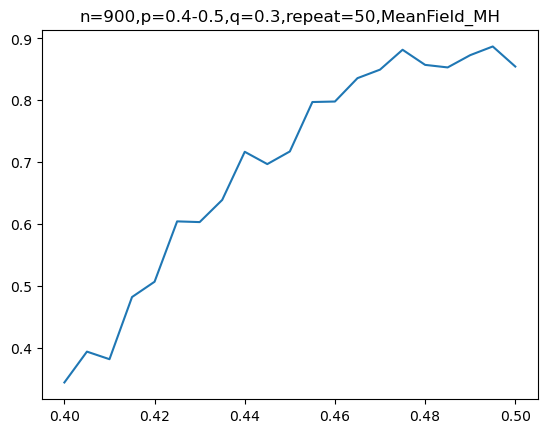

In [17]:
# 找相变点
fig = plt.figure()
x = p_range
y = mistake_rate_list
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) + ',' + 'repeat=' + str(repeat) + ',' + 'MeanField_MH'
plt.title(fig_name)
plt.plot(x, y)
save_file = "E:/学习/研三/Code/threshold_meanfield" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [25]:
meanfield_finalR_list_detail = []
repeat = 50
pkl_number = repeat - 1
p_range_detail = [round(i,4) for i in np.linspace(0.40, 0.50, 21)]
for p in p_range_detail:
    datadir = "E:/学习/研三/Code/threshold_meanfield" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat"
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    meanfield_finalR_list_detail.append(data_temp[3])
    #print(data_temp[3])

In [26]:
len(meanfield_finalR_list_detail[0])

50

In [ ]:
partially_recover_list = []

In [36]:
partially_recover_list = []
for i in range(21):
    mis_de_list = np.array(mistake_rate_detail(meanfield_finalR_list_detail[i]))
    partially_recover_list.append(len(mis_de_list[mis_de_list > 0.6]))
partially_recover_list

[2,
 4,
 3,
 15,
 14,
 28,
 25,
 28,
 36,
 33,
 36,
 43,
 44,
 45,
 48,
 47,
 45,
 47,
 46,
 50,
 46]

In [31]:
mis_de_list

array([0.22083333, 0.61333333, 0.475     , 0.21166667, 0.4125    ,
       0.33333333, 0.67666667, 0.13833333, 0.57333333, 0.37      ,
       0.465     , 0.16416667, 0.18916667, 0.37583333, 0.17583333,
       0.30416667, 0.59833333, 0.47333333, 0.2925    , 0.27916667,
       0.445     , 0.43      , 0.15916667, 0.2625    , 0.25833333,
       0.16083333, 0.45583333, 0.43666667, 0.20583333, 0.41916667,
       0.46833333, 0.32166667, 0.39333333, 0.27666667, 0.3       ,
       0.13333333, 0.3225    , 0.28916667, 0.42666667, 0.26833333,
       0.2925    , 0.38166667, 0.27833333, 0.1225    , 0.2625    ,
       0.36333333, 0.31833333, 0.42583333, 0.48333333, 0.485     ])

In [32]:
len(mis_de_list[mis_de_list > 0.6])

2

In [138]:
for _ in range(repeat):
    print('classic',finalRI_list_classic[10][_],'\n', finalR_list_classic[10][_],'\n'
          'meanfield',finalRI_list_meanfield[10][_],'\n', finalR_list_meanfield[10][_])

classic 0.7733999260081391 
 [[163   0 150]
 [  2 298   1]
 [135   2 149]] 
meanfield 0.7213737822172894 
 [[  7  32 240]
 [194  46  26]
 [ 99 222  34]]
classic 0.7728425206560612 
 [[  0 156 131]
 [  2 142 166]
 [298   2   3]] 
meanfield 0.6892267850536441 
 [[ 10 164  97]
 [233  11   5]
 [ 57 125 198]]
classic 0.9289900110987791 
 [[276   3  18]
 [  3 293   2]
 [ 21   4 280]] 
meanfield 0.7886619805154766 
 [[  2 240   9]
 [ 45  56 238]
 [253   4  53]]
classic 0.717669256381798 
 [[ 43 108 132]
 [  1 186 162]
 [256   6   6]] 
meanfield 0.7304895794795906 
 [[ 53  10 231]
 [ 18 215   2]
 [229  75  67]]
classic 0.99118017018128 
 [[298   2   0]
 [  0 298   2]
 [  2   0 298]] 
meanfield 0.7679911209766925 
 [[241   3  26]
 [  5 229  30]
 [ 54  68 244]]
classic 0.7683290171414477 
 [[173 145   3]
 [  0   0 292]
 [127 155   5]] 
meanfield 0.6143075595017882 
 [[247 182 106]
 [ 44 115   8]
 [  9   3 186]]
classic 0.7712122333210013 
 [[143   0 165]
 [156   5 135]
 [  1 295   0]] 
meanfield

In [119]:
RI_frequency_classic[15]

array([ 5,  0, 18,  2, 25])

In [117]:
RI_frequency_meanfield[15]

array([ 6, 10, 15, 16,  3])

DoubleJump_MH

In [413]:
p_range = [round(i,4) for i in np.linspace(0.70, 0.90, 11)]
repeat = 10

In [414]:
finalR_list = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_doublejump" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" + str(pkl_number)
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finalR_list.append(data_temp[3])
    #print(data_temp[3])

In [415]:
mistake_rate_list = []
for i in range(len(finalR_list)):
    mistake_rate_list.append(mistake_rate(finalR_list[i]))

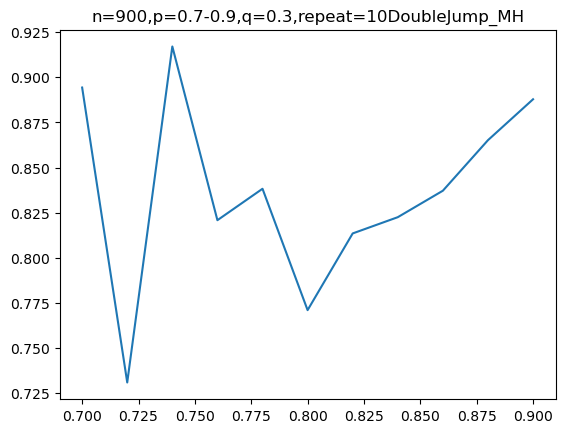

In [416]:
fig = plt.figure()
x = p_range
y = mistake_rate_list
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) + ',' + 'repeat=' + str(repeat) + 'DoubleJump_MH'
plt.title(fig_name)
plt.plot(x, y)
save_file = "E:/学习/研三/Code/threshold_doublejump" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [31]:
p_range = [round(i,4) for i in np.linspace(0.60, 0.90, 31)]
repeat = 50

In [32]:
finalR_list = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_doublejump" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" + str(pkl_number)
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finalR_list.append(data_temp[3])
    #print(data_temp[3])

In [33]:
mistake_rate_list = []
for i in range(len(finalR_list)):
    mistake_rate_list.append(mistake_rate(finalR_list[i]))

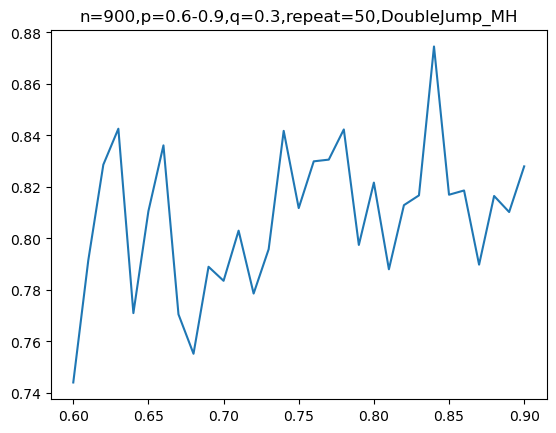

In [34]:
fig = plt.figure()
x = p_range
y = mistake_rate_list
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) + ',' + 'repeat=' + str(repeat) + ',' + 'DoubleJump_MH'
plt.title(fig_name)
plt.plot(x, y)
save_file = "E:/学习/研三/Code/threshold_doublejump" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [66]:
doublejump_finalR_list_detail = []
pkl_number = repeat - 1
p_range_detail = [round(i,4) for i in np.linspace(0.80, 0.85, 6)]
for p in p_range_detail:
    datadir = "E:/学习/研三/Code/threshold_doublejump" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" + str(pkl_number)
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    doublejump_finalR_list_detail.append(data_temp[3])
    #print(data_temp[3])

In [67]:
doublejump_finalR_list_detail

[[array([[  0, 300,   0],
         [  0,   0, 300],
         [300,   0,   0]]),
  array([[  0,   0, 291],
         [  1,   2,   9],
         [299, 298,   0]]),
  array([[298,   0, 300],
         [  0, 288,   0],
         [  2,  12,   0]]),
  array([[  0, 300,   0],
         [  0,   0, 300],
         [300,   0,   0]]),
  array([[  0,   0, 280],
         [  2,   0,  20],
         [298, 300,   0]]),
  array([[  9,   1,   1],
         [  0, 299, 299],
         [291,   0,   0]]),
  array([[ 16,  14,  21],
         [284, 286,   0],
         [  0,   0, 279]]),
  array([[294, 295,   0],
         [  6,   5,  17],
         [  0,   0, 283]]),
  array([[300,   0,   0],
         [  0, 300,   0],
         [  0,   0, 300]]),
  array([[  0, 300,   0],
         [  0,   0, 300],
         [300,   0,   0]]),
  array([[  0,   0, 300],
         [  0, 300,   0],
         [300,   0,   0]]),
  array([[  1,   9,   1],
         [  0, 291,   0],
         [299,   0, 299]]),
  array([[  0,   0, 300],
         [  0,

In [383]:
p_range = [round(i,3) for i in np.linspace(0.70, 0.90, 11)]
repeat = 5

In [384]:
p_range

[0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75]

In [386]:
finalR_list = []
pkl_number = repeat - 1
for p in p_range:
    datadir = "E:/学习/研三/Code/threshold_doublejump" + "/" + "K" + str(K) + "n" + str(n) + "p" + str(p) + "q" + str(q) + "/" + "output_repeat" + str(pkl_number)
    data_temp = pickle.load(open(datadir + '.pkl','rb'))
    #print(datadir)
    finalR_list.append(data_temp[3])
    #print(data_temp[3])

In [388]:
mistake_rate_list = []
for i in range(len(finalR_list)):
    mistake_rate_list.append(mistake_rate(finalR_list[i]))

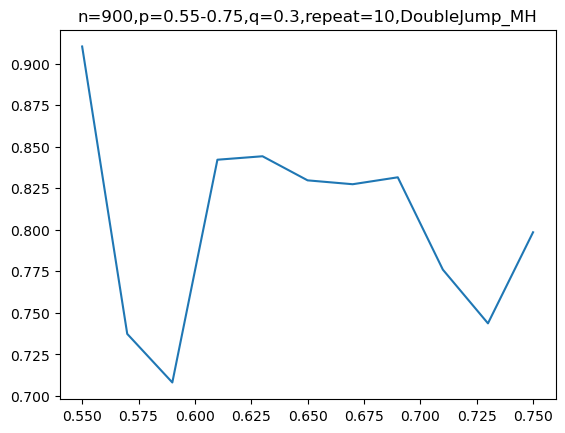

In [389]:
fig = plt.figure()
x = p_range
y = mistake_rate_list
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n) + ',' + 'p=' + str(p_range[0]) + '-' + str(p_range[-1]) + ',' + 'q='+str(q) + ',' + 'repeat=' + str(repeat) + ',' + 'DoubleJump_MH'
plt.title(fig_name)
plt.plot(x, y)
save_file = "E:/学习/研三/Code/threshold_doublejump" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

# MCMC Algorithm

In [27]:
def classic_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        # new_e, ind, b, b_prime = updateK_L(curr_e, 0)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [143]:
def MeanField_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [331]:
def DoubleJump_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_L(curr_e, K, curr_matO)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [118]:
def Wolff_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_Wolff(curr_e)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

# Main

In [28]:
niter = niter * n
niter

9000

classic_MHsampler

In [29]:
test_num = 2
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [30]:
repeat = 5

In [113]:
## main for classic_MHsampler
logpost_save = []
initR_each_repeat_save = []
alginitR_save = []
finalR_save = []

for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 1
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    alginitR_save.append(alginitR)
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR
    initR_save = []

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))
        initR_save.append(np.sum(initR - np.diag(np.diag(initR))))

        res = classic_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
        
    initR_each_repeat_save.append([initR_save])
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))
    
    logpost_save.append(logPostList)
    finalR_save.append(finalR)

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[114 109  94]
 [ 95 113  98]
 [ 91  78 108]]
initial mistake is 565
initial mistake is 335
initial mistake is 597
initial mistake is 600
initial alginitR:  [[127  90  90]
 [ 85 114 105]
 [ 88  96 105]]
initial mistake is 554
initial mistake is 771
initial mistake is 769
initial mistake is 900
initial alginitR:  [[109 105  88]
 [ 95 103 114]
 [ 96  92  98]]
initial mistake is 590
initial mistake is 662
initial mistake is 898
initial mistake is 900
initial alginitR:  [[105  93  95]
 [101 116 104]
 [ 94  91 101]]
initial mistake is 578
initial mistake is 700
initial mistake is 606
initial mistake is 600
initial alginitR:  [[101  92 100]
 [ 94 116  95]
 [105  92 105]]
initial mistake is 578
initial mistake is 893
initial mistake is 900
initial mistake is 900


In [119]:
len(logpost_save[0])

4

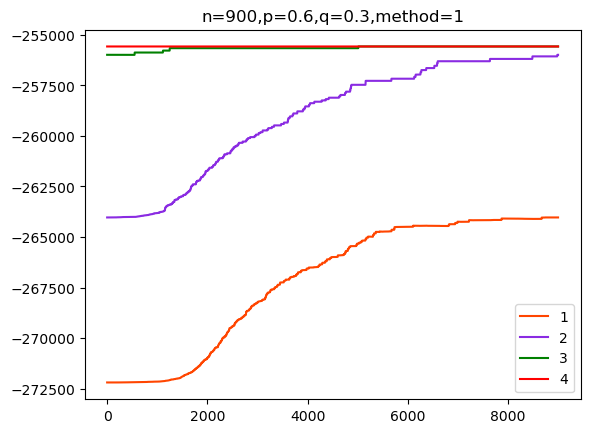

In [118]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logpost_save[0][0]))
y1 = logpost_save[0][0]
y2 = logpost_save[0][1]
y3 = logpost_save[0][2]
y4 = logpost_save[0][3]
#y5 = logpost_save[0][4]

#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + ',' + 'method=1'
plt.title(fig_name)
#plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y1, color='orangered', label='1')
plt.plot(x, y2, color='blueviolet', label='2')
plt.plot(x, y3, color='green', label='3')
plt.plot(x, y4, color='red', label='4')
plt.legend()
#save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

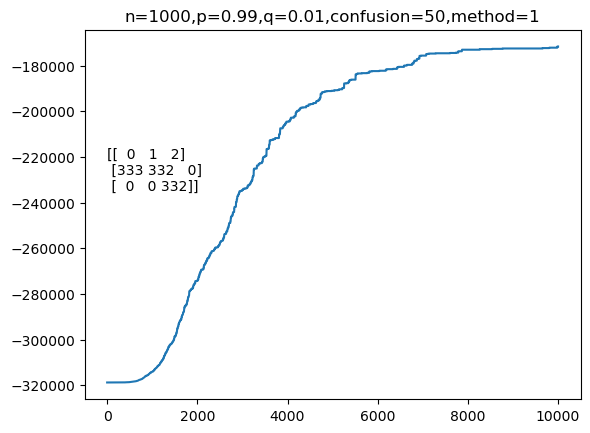

In [388]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + ','  + 'method=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

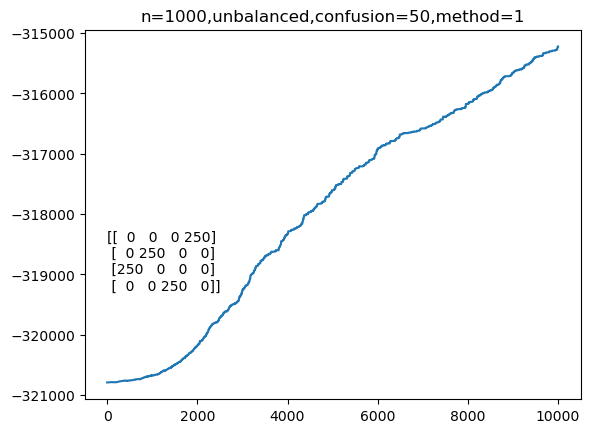

In [433]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' +  'unbalanced' + ',' + 'confusion='+str(halfn)+',' + 'method=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

MeanField_MHsampler

In [141]:
test_num = 2
dirmake = "./K" + str(K) + "n" + str(n) str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [154]:
repeat = 2

In [155]:
logpost_save = []
initR_each_repeat_save = []
alginitR_save = []
finalR_save = []

## main for MeanField_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 1
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    alginitR_save.append(alginitR)
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR
    initR_save = []

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))
        initR_save.append(np.sum(initR - np.diag(np.diag(initR))))

        res = MeanField_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    
    initR_each_repeat_save.append([initR_save])
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))
    
    logpost_save.append(logPostList)
    finalR_save.append(finalR)

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[ 87  99 101]
 [113  97 102]
 [100 104  97]]
initial mistake is 619


<ipython-input-24-5d905e2dfbce>:3: RuntimeWarning: invalid value encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)


initial mistake is 648
initial mistake is 877
initial mistake is 894
initial alginitR:  [[ 99 103 109]
 [ 96  89  92]
 [105 108  99]]
initial mistake is 613


<ipython-input-143-2a5b458da71c>:49: RuntimeWarning: overflow encountered in exp
  if tmp < np.exp(xi * logdiff):
<ipython-input-24-5d905e2dfbce>:3: RuntimeWarning: divide by zero encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)


initial mistake is 705
initial mistake is 870
initial mistake is 900


In [157]:
initR_each_repeat_save

[[[619, 648, 877, 894]], [[613, 705, 870, 900]]]

In [158]:
alginitR_save

[array([[ 87,  99, 101],
        [113,  97, 102],
        [100, 104,  97]]),
 array([[ 99, 103, 109],
        [ 96,  89,  92],
        [105, 108,  99]])]

In [159]:
finalR_save

[array([[  0, 269,   0],
        [300,   0, 300],
        [  0,  31,   0]]),
 array([[  0,   0, 300],
        [300,   0,   0],
        [  0, 300,   0]])]

In [163]:
len(logpost_save[0][0])

9000

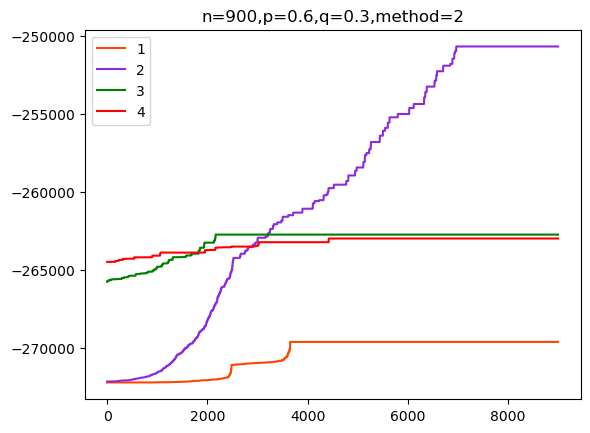

In [164]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logpost_save[0][0]))
y1 = logpost_save[0][0]
y2 = logpost_save[0][1]
y3 = logpost_save[0][2]
y4 = logpost_save[0][3]
#y5 = logpost_save[0][4]

#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + ',' + 'method=2'
plt.title(fig_name)
#plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y1, color='orangered', label='1')
plt.plot(x, y2, color='blueviolet', label='2')
plt.plot(x, y3, color='green', label='3')
plt.plot(x, y4, color='red', label='4')
plt.legend()
#save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
#plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

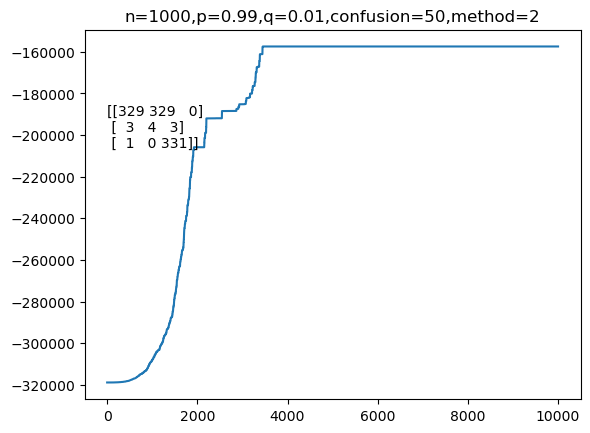

In [451]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + ',' + 'method=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-8000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

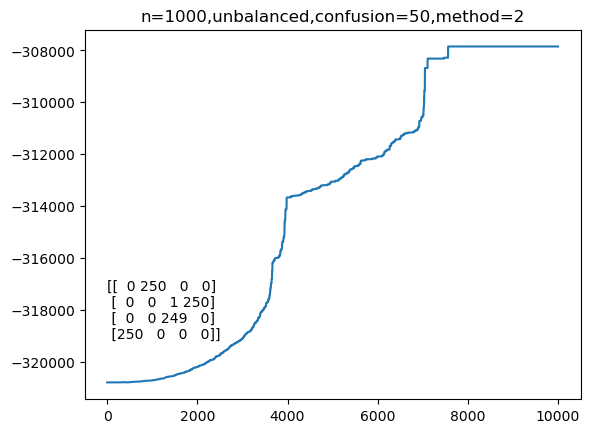

In [441]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'unbalanced' + ',' + 'confusion='+str(halfn)+',' + 'method=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

DoubleJump_MHsampler

In [407]:
test_num = 3
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [154]:
repeat = 3

In [376]:
## main for DoubleJump_MHsampler
logpost_save = []
initR_each_repeat_save = []
alginitR_save = []
finalR_save = []

for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 1
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR
    initR_save = []

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = DoubleJump_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
        
    
    initR_each_repeat_save.append([initR_save])
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))
    
    logpost_save.append(logPostList)
    finalR_save.append(finalR)

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[80 66 61 62]
 [53 71 50 62]
 [59 57 76 58]
 [58 56 63 68]]
initial mistake is 705


<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: invalid value encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)
<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: divide by zero encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)


initial mistake is 731
initial mistake is 707
initial mistake is 744


In [157]:
initR_each_repeat_save

[[[619, 648, 877, 894]], [[613, 705, 870, 900]]]

In [158]:
alginitR_save

[array([[ 87,  99, 101],
        [113,  97, 102],
        [100, 104,  97]]),
 array([[ 99, 103, 109],
        [ 96,  89,  92],
        [105, 108,  99]])]

In [159]:
finalR_save

[array([[  0, 269,   0],
        [300,   0, 300],
        [  0,  31,   0]]),
 array([[  0,   0, 300],
        [300,   0,   0],
        [  0, 300,   0]])]

In [163]:
len(logpost_save[0][0])

9000

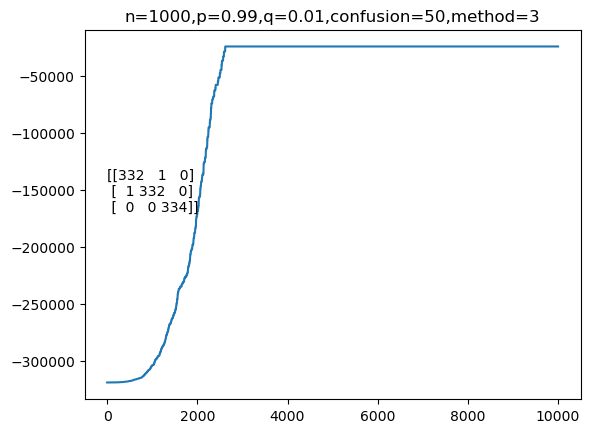

In [412]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'method=3'
plt.title(fig_name)
plt.text(4,logPostList[0][-8000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

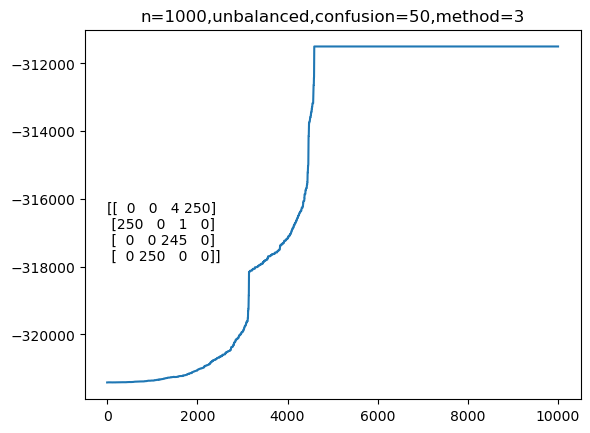

In [378]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'unbalanced' + ',' + 'confusion='+str(halfn)+',' + 'method=3'
plt.title(fig_name)
plt.text(4,logPostList[0][-6500], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [68]:
finalR

array([[300,   0,   0],
       [  0, 300,   0],
       [  0,   0, 300]])

Wolff_MHsampler

In [168]:
test_num = 4_1
dirmake = "./K" + str(K) + "n" + str(n) + "xi" + str(xi) + "_exp" + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [144]:
## main for Wolff_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 50
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = Wolff_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[104  88 102]
 [ 91 113  95]
 [105  99 103]]
initial mistake is 580


NameError: name 'Wolff_MHsampler' is not defined

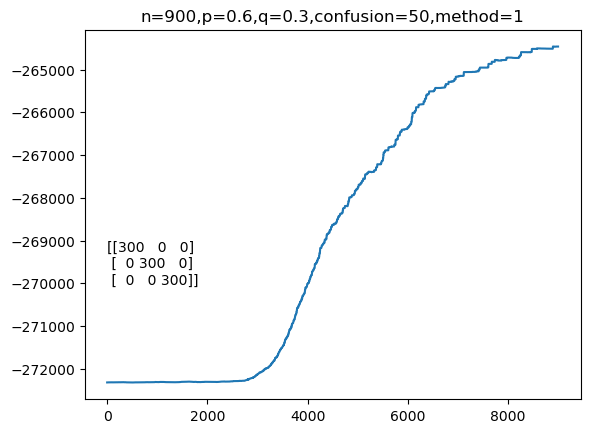

In [41]:
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'method=4'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
data_output[0][0]

In [ ]:
x = range(len(data_output[0][0]))
y = data_output[0][0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
## c=0.99
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'post=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + 'confusion='+str(halfn)+',' + 'post=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
logPostList[0][-1]

In [ ]:
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'post=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
x